## 数理统计专题

In [1]:
# 引入相关工具库
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei','Songti SC','STFangsong']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import seaborn as sns 

&emsp;&emsp;前面的概率论专题，我们已经详细地学习了概率论的相关知识，并且针对某些特定问题使用概率论进行建模。但是在概率论的建模中，往往假设随机变量的分布已知，但是这个假设在实际中时很难做到的。现在，我们使用投资组合风险分析来说明：在前面的案例中，我们假设 $A$、$B$ 股票的收益率服从$N(0.1,0.01)$ 和 $N(0.3,0.04)$，但现实是市场上并不会告诉我们股票的收益分布是什么，能做的只有根据历史数据进行合理的猜测与估算，而不同的股票的收益率分布都不一样。那么统计学能做的就是对不同的股票合理估算和猜测相应的收益率的分布，找到最佳的参数，如正态分布的 $\mu$ 和 $\sigma^2$。不仅如此，统计学关心的不只有 $\mu$ 和 $\sigma^2$ 是多少，也会关心比如 $\mu$ 和 $\sigma^2$ 是否符合符合相关要求等等。

&emsp;&emsp;使用一个更通俗的例子来说，由于概率论的建模，现在假设中国人的身高近似服从正态分布，那究竟这个正态分布中的 $\mu$ 和 $\sigma^2$ 的值是多少就是统计学做的事情，而这个工作也叫做参数估计，后面的内容会详细介绍。

&emsp;&emsp;**一般认为，统计学是收集、分析、表述和解释数据的科学，统计学是一门处理数据的方法和技术的学科。**

### 1 总体和样本

&emsp;&emsp;在一个统计问题中, 我们把研究对象的全体称为**总体**，构成总体的每个成员称为**个体**。对大多数实际问题, 总体中的个体是一些实在的人或物，如：假如我们想要研究中国人的身高情况，那么全体中国人构成该研究问题的总体，而每一个中国人就是构成该研究问题的个体。但是，在实际的操作中，我们只关心每个中国人的身高，并不关心每个中国人的年龄、性别等。因此，每个中国人的**数量指标**——身高就变成了个体，而全体中国人的所有身高也就构成了总体。因此总体和个体就是一堆数字，这堆数字有大有小，每个数字出现的可能性又不太一样，看似有某个规律。因此，我们使用一个概率分布描述和归纳总体是合适的且合理的，换句话来说：**总体就是一个概率分布，总体的数量指标就是服从该概率分布的一个随机变量**。因此，从总体中抽样与从某个分布中抽样的含义是一样的。

&emsp;&emsp;举个例子：去银行排队办理业务，队伍中排了非常多的人，我们想要研究队伍中每个人的排队等待的时间情况。因此，这个问题的研究总体为队伍里排队的所有人，个体是每一个排队等待的人，我们想要关心的数量指标是排队的时间，有人排5分钟，有人排3.2分钟等等，队伍里排队的所有人的一个数量指标：等待时间构成了一个随机变量，假设这个随机变量服从参数为 $\lambda$ 的指数分布 $Exp(\lambda)$。但是分布中的参数 $\lambda$ 是未知的，$\lambda$ 的大小决定了银行服务系统的质量，它直接影响了银行的声誉。

&emsp;&emsp;本例中总体分布的类型是明确的，该分布是指数分布，但是总体含有末知参数 $\lambda$，因此总体不是一个特定的泊松分布。要确定最终的总体分布, 就是要确定符合具体某个队伍的 $\lambda$，这是统计学科的任务之一。

&emsp;&emsp;**一般来说，总体分为：有限总体和无限总体，大多数我们说的总体是无限总体**。

&emsp;&emsp;由于总体是无限的，又或者说总体的个体数量太多，如果对每个个体的数量指标都进行研究，所花费的成本将是十分巨大的。为了了解总体的分布，我们从总体中随机地抽取 $n$ 个个体，记其指标值为 $x_1, x_2, \cdots, x_n$，则 $x_1, x_2, \cdots, x_n$ 称为总体的一个样本，$n$ 称为样本容量，或简称样本量，样本中的个体称为样品。

<div>
<img src="./images/13.svg" width="400" align="middle"/>
</div>

&emsp;&emsp;下面这段描述样本的概念是非常重要的，希望大家牢牢谨记！！！

&emsp;&emsp;样本具有所谓的二重性：一方面, 由于样本是从总体中随机抽取的，抽取前无法预知它们的数值，因此，样本是一个随机变量，用大写字母 $X_1, X_2, \cdots, X_n$ 表示；另一方面，样本在抽取以后经观测就有确定的观测值，因此，样本又是一组数值，此时用小写字母 $x_1, x_2, \cdots, x_n$ 表示是合适的。为了描述的简单，我们只用小写字母表示样本 $x_1, x_2, \cdots, x_n$，不管样本是随机变量还是具体的数值，都用小写字母表示。

&emsp;&emsp;举个例子：某个肉类产品的规定净重为1kg，由于生产过程中具有随机性，不可能让所有实际生产的肉类品都是1kg，现在从同一批次生产的肉类产品随机抽取10份肉类品进行质量检查并称重，称重结果如下：

$$
\begin{array}{llllllllll}
0.98 & 0.99 & 0.95 & 1.01 & 1.04 & 0.96 & 0.96 & 1.03 & 0.98 & 1.00
\end{array}
$$

&emsp;&emsp;这是一个容量为10的样本的观测值，对应的总体为该厂生产的肉类产品的净重。

&emsp;&emsp;从总体中抽取样本的方式多种多样，随心所欲，如：从大到小抽取、随机抽取等等。为了能由样本对总体作出较可靠的推断, 就希望样本能很好地代表总体。需要对抽样的方法提出一些要求，最常用的抽样方法就是“简单随机抽样”，简单随机抽样需要满足两个要求：

- 从总体中抽取的样本具有代表性：具有代表性要求总体中每一个个体都有同等机会被选入样本中，也就意味着样本中的每一个样品 $x_i$ 与总体 $X$ 有相同的分布，简称“同分布”。
- 从总体中抽取的样本具有独立性：具有独立性即要求样本中每一样品的取值不影响其他样品的取值，也就意味着 $x_1, x_2, \cdots, x_n$ 之间相互独立。

&emsp;&emsp;总结起来：**在简单随机抽样这种抽样方法下，样本中的每一个样品 $x_1, x_2, \cdots, x_n$ 之间独立同分布，同分布于总体分布，简称：iid**。用简单随机抽样方法得到的样本称为简单随机样本，也简称样本。

&emsp;&emsp;设总体 $X$ 具有分布函数 $F(x)$，$x_1, x_2, \cdots, x_n$ 为取自该总体的容量为 $n$ 的样本，则样本联合分布函数为
$$
F(x_1, x_2, \cdots, x_n) = \prod_{i=1}^n F(x_i)
$$

&emsp;&emsp;这个公式在极大似然估计的时候会再次碰到，是一条十分重要的公式！

&emsp;&emsp;有没有情况是不符合独立同分布的假设呢？其实很多情况下是不满足独立同分布的假设的，比如：时间序列数据，前后之间存在关联，因此不是相互独立的。

### 2 经验分布函数与直方图

（1）经验分布函数：

&emsp;&emsp;统计学的一个重要核心就是使用样本信息估计总体信息，有的时候总体往往是未知的，我们只能通过多次试验的样本（即实际值）来推断总体。经验分布函数就是使用样本信息构造的分布函数近似未知的总体分布函数：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是取自总体分布函数为 $F(x)$ 的样本，若将样本观测值由小到大进行排列，记为 $x_{(1)}, x_{(2)}, \cdots, x_{(n)}$，则 $x_{(1)}, x_{(2)}, \cdots, x_{(n)}$ 称为有序样本，用有序样本定义如下函数：
$$
F_n (x) = \begin{cases}
0, & \text { 当 } x<x_{(1)} \\ 
k / n, & \text { 当 } x_{(k)} \leqslant x < x_{(k+1)}, k=1,2, \cdots, n-1 \\ 
1, & \text { 当 } x \geqslant x_{(n)}
\end{cases}
$$
&emsp;&emsp;则 $F_n(x)$ 是一个非减右连续函数，且满足
$$
F_n (-\infty) = 0 \text { 和 } F_{n}(\infty) = 1
$$
&emsp;&emsp;由此可见， $F_n (x)$ 是一个分布函数， 称 $F_n(x)$ 为该样本的经验分布函数。

&emsp;&emsp;为什么样本信息可以用来推断总体呢？格纹利柯定理给我们指明了一个方向：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是取自总体分布函数为 $F(x)$ 的样本，$F_n (x)$ 是其经验分布函数，当 $n \rightarrow \infty$ 时，有
$$
P\left( \sup _{-\infty < x < \infty} | F_n (x) - F(x) | \rightarrow 0 \right) = 1 
$$
&emsp;&emsp;当 $n$ 相当大时，经验分布函数是总体分布函数 $F(x)$ 的一个良好的近似。因此，在经典统计学中一切统计推断都是以样本为依据推断总体。

【例子】随机观察总体$X$，得到一个容量为10的样本：

$$
3.2, \quad 2.5, \quad-2, \quad 2.5, \quad 0,\quad 3,\quad 2 ,\quad 2.5, \quad 2, \quad 4
$$

求 $X$ 的经验分布函数。

**解：**

&emsp;&emsp;首先，将样本排序 $-2 < 0 < 2 = 2 < 2.5 = 2.5 = 2.5 < 3 < 3.2 < 4$

&emsp;&emsp;于是，根据公式可以得到经验分布函数：
$$
F_{10}(x) = \left \{ \begin{array}{cc}
0, & x < -2 \\
1/10, & -2 \leq x<0 \\
2/10, & 0 \leq x<2 \\
4/10, & 2 \leq x<2.5 \\
7/10, & 2.5 \leq x<3 \\
8/10, & 3 \leq x<3.2 \\
9/10, & 3.2 \leq x<4 \\
1, & x \ge 4
\end{array} \right.
$$

（2）直方图：频数直方图和频率直方图

&emsp;&emsp;直方图是数值数据分布的精确图形表示，这是一个连续变量（定量变量）的概率分布的估计，被卡尔·皮尔逊（Karl Pearson）首次引入。

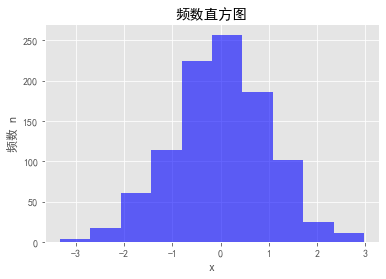

In [2]:
# 频数直方图
x_samples = np.random.randn(1000)
plt.hist(x_samples, bins=10, color='blue', alpha=0.6)  # bins=10代表10根柱子
plt.xlabel("x")
plt.ylabel("频数 n")
plt.title("频数直方图")
plt.show()

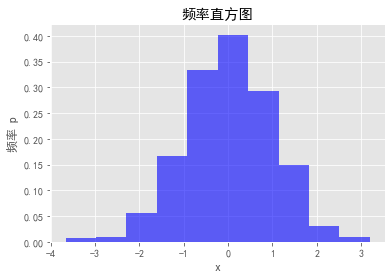

In [3]:
# 频率直方图
x_samples = np.random.randn(1000)
plt.hist(x_samples, bins=10, color='blue',
         alpha=0.6, density=True)  # bins=10代表10根柱子
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("频率直方图")
plt.show()

### 3.统计量与三大抽样分布

（1）统计量：

&emsp;&emsp;在统计学中，我们希望使用样本信息推断总体，而且样本也来源于总体，但是样本的信息较为分散，有时候还会显得杂乱无章。为了将这些信息分散的样本中有关总体的那部分信息汇集起来，从而反映总体的某些特征，需要对样本进行加工。前面的直方图就是一个很好的加工方式，但是直方图这样的图形化方式有一个致命的缺点就是无法数值化进行研究（例如比较两个总体某个特征的大小）。进行数值化最有效的方式就是构造关于样本的函数，函数是数值化最直接的办法，而且不同的关于样本的函数反映了总体的不同特征。统计量就是在这样的背景中诞生的：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 为取自某总体的样本，若样本函数 $T = T(x_1, x_2, \cdots, x_n)$ 中**不含有任何末知参数**，则称 $T$ 为统计量。统计量的分布称为抽样分布。

&emsp;&emsp;例如：若 $x_1, x_2, \cdots, x_n$ 为样本，则 $\displaystyle \sum_{i=1}^n x_i, \sum_{i=1}^n x_i^2$ 以及 $F_n (x)$ 都是统计量，我们从中学开始学习的样本平均数 $\displaystyle \bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n} = \frac{1}{n} \sum_{i=1}^n x_i$ 和样本方差$\displaystyle s_n^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2$ 都是统计量，因为这些函数都是只关于样本的函数，不含未知参数。而当 $\mu, \sigma^2$ 未知时，$x_1 - \mu, \dfrac{x_1}{\sigma}$ 等均不是统计量。值得注意的是：统计量由样本决定，从而统计量因样本而异，对于同一总体，由于抽取样本是具有随机性的，因此抽取不同的样本，统计量就不同，从而统计量也是一个随机变量。统计量的分布称为抽样分布。虽然统计量不依赖于任何参数，但统计量的分布一般依赖于未知参数。

<div>
<img src="./images/14.svg" width="600" align="middle"/>
</div>

下面介绍几个常用的统计量及其对应的抽样分布：

（1.1）样本均值：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 为取自某总体的样本，其算术平均值称为样本均值，一般用 $\bar{x}$ 表示，即
$$
\bar{x} = \frac{x_1 + x_2 + \cdots + x_n}{n} = \frac{1}{n} \sum_{i=1}^n x_i 
$$
&emsp;&emsp;如果把样本中的数据与样本均值的差称为偏差，则样本所有偏差之和为0，即 $\displaystyle \sum_{i=1}^n (x_i - \bar{x}) = 0$。

In [4]:
# 从总体/总体的分布中抽取样本并计算样本均值和计算偏差
# （1）从总体中抽取样本
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
             13, 14, 15, 16, 17, 18, 19, 20])   # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_mean = np.mean(x_i)  # 计算样本均值
x_bias = np.sum(x_i-x_mean)  # 计算偏差和
print("样本均值为：", x_mean)
print("偏差和为：", x_bias)

样本均值为： 12.0
偏差和为： 0.0


In [5]:
# （2）从总体分布中抽取样本，假设总体分布为N（0，1）
x_i = np.random.randn(10)  # 从总体分布N(0,1)中抽取10个样本
x_mean = np.mean(x_i)  # 计算样本均值
x_bias = np.sum(x_i-x_mean)  # 计算偏差和
print("样本均值为：", x_mean)
print("偏差和为：", x_bias)

样本均值为： -0.837289297673161
偏差和为： 0.0


接下来，我们来看看样本均值的分布是什么？我们使用一个实验给大家说明：  
（a）假设现在有20个数组成的总体；  
（b）每次从总体中抽取5个样本，计算样本均值；  
（c）重复b步骤5次、10次、20次、100次、1000次、10000次、100000次，观察不同重复次数的抽样的样本均值的分布情况。

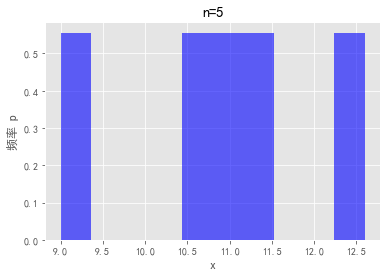

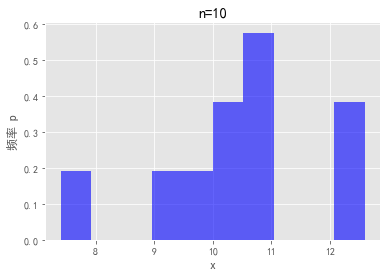

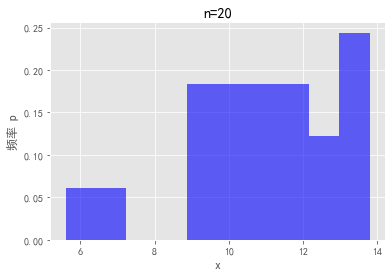

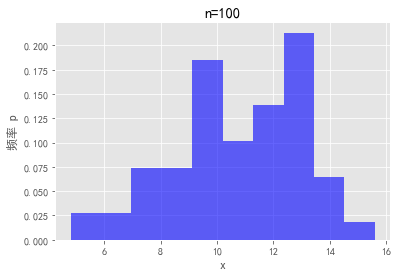

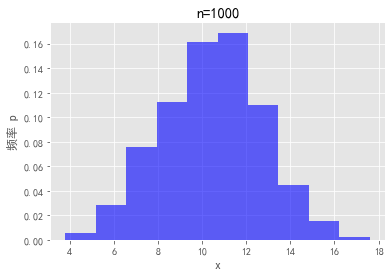

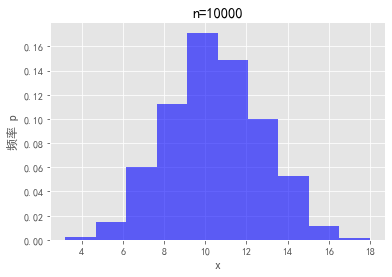

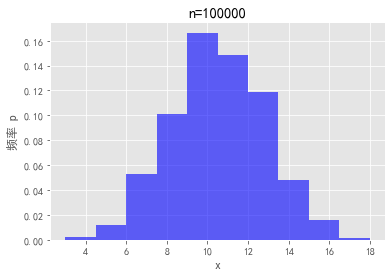

In [6]:
def GetSampleDist(n, X):
    x_mean_list = []
    for i in range(n):
        x_i = np.random.choice(X, 5, replace=False)
        x_mean = np.mean(x_i)
        x_mean_list.append(x_mean)
    plt.hist(x_mean_list, color='blue', alpha=0.6, density=True)
    plt.xlabel("x")
    plt.ylabel("频率 p")
    plt.title("n="+str(n))
    plt.show()


X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
             15, 16, 17, 18, 19, 20])   # 假设总体为X, size=20
GetSampleDist(5, X)
GetSampleDist(10, X)
GetSampleDist(20, X)
GetSampleDist(100, X)
GetSampleDist(1000, X)
GetSampleDist(10000, X)
GetSampleDist(100000, X)

&emsp;&emsp;因此，从上面的实验可以看到，统计量——样本均值的分布，即样本均值的抽样分布，当 $n$ 越来越大时，近似服从正态分布，具体来说：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是来自某个总体的样本，$\bar{x}$ 为样本均值。

（1）若总体分布为 $N(\mu, \sigma^2)$，则 $\bar{x}$ 的精确分布为 $N(\mu, \dfrac{\sigma^2}{n})$  

（2）若总体分布末知或不是正态分布，$E(x) = \mu, \text{Var}(x) = \sigma^2$ 存在，则 $n$ 较大时，$\bar{x}$ 的渐近分布为 $N(\mu, \dfrac{\sigma^2}{n})$。渐近分布是指 $n$ 较大时的近似分布。

（1.2）样本方差与样本标准差：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 为取自某总体的样本，则关于样本均值 $\bar{x}$ 的平均偏差平方和
$$
s_n^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2
$$
称为样本方差。

&emsp;&emsp;样本标准差就是样本方差的算术平方根，即 $s_n = \sqrt{s_n^2}$。

&emsp;&emsp;在实际的应用中，我们往往不会直接使用样本方差，更倾向于使用样本标准差，因为样本方差的量纲（单位）与样本均值不一致，无法与样本均值进行加减运算。实际上，样本标准差可以与均值发生计算关系，表示数据的范围，如 $(\bar{x} - 3 s_n, \bar{x} + 3 s_n)$ 表示数据的范围在样本均值的三个标准差范围，而方差由于量纲不一致做不到与样本均值的联动。

&emsp;&emsp;另外，样本方差除了上述的表达式，还有另一个表达式：$\displaystyle s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$。$s^2$ 常被称为无偏方差，什么是无偏将在后面的内容讲解，这里大家只需要知道的就是：当样本量较大时，$s_n^2$ 与 $s^2$ 相差不大，可以随意使用，当样本量较小时，计算样本方差最好使用无偏样本方差 $s^2$。

&emsp;&emsp;**值得注意的是：后面我们所说的样本方差都是指无偏样本方差 $s^2$ 而不是 $s_n^2$，请大家注意。**

In [7]:
# 从总体/总体的分布中抽取样本并计算样本方差与样本标准差
# （1）从总体中抽取样本
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
             13, 14, 15, 16, 17, 18, 19, 20])   # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_sn2 = np.var(x_i, ddof=0)  # 样本方差
x_s2 = np.var(x_i, ddof=1)  # 无偏样本方差
x_sn = np.std(x_i, ddof=0)  # 样本标准差
x_s = np.std(x_i, ddof=1)  # 无偏样本标准差
print("样本方差sn^2为：", x_sn2)
print("样本方差s^2为：", x_s2)
print("样本标准差sn^2为：", x_sn)
print("样本标准差s^2为：", x_s)

样本方差sn^2为： 20.49
样本方差s^2为： 22.766666666666666
样本标准差sn^2为： 4.5265881191025095
样本标准差s^2为： 4.771442828607157


In [8]:
# （2）从总体分布中抽取样本，假设总体分布为N（0，1）
x_i = np.random.randn(10)  # 从总体分布N(0,1)中抽取10个样本
x_sn2 = np.var(x_i, ddof=0)  # 样本方差
x_s2 = np.var(x_i, ddof=1)  # 无偏样本方差
x_sn = np.std(x_i, ddof=0)  # 样本标准差
x_s = np.std(x_i, ddof=1)  # 无偏样本标准差
print("样本方差sn^2为：", x_sn2)
print("样本方差s^2为：", x_s2)
print("样本标准差sn^2为：", x_sn)
print("样本标准差s^2为：", x_s)

样本方差sn^2为： 0.9541628314671
样本方差s^2为： 1.0601809238523332
样本标准差sn^2为： 0.9768125876887029
样本标准差s^2为： 1.0296508747397504


样本方差/样本标准差的分布：

&emsp;&emsp;事实上，样本方差/样本标准差的分布并没有像样本均值那样有完美的渐近分布，不同总体下的样本方差/样本标准差的分布都不一样，我们在下一节内容给大家介绍，当总体服从正态分布条件下的与样本方差/样本标准差有关的分布，它是三大抽样分布中著名的卡方分布。在这里，我们可以发现如下规律：

&emsp;&emsp;设总体为 $X$ 方差存在，即 $E(X) = \mu, \text{Var}(X) = \sigma^2 < \infty, x_1, x_2, \cdots, x_n$ 为从该总体得到的样本，$\bar{x}$ 和 $s^2$ 分别是样本均值和样本方差，则
$$
E(\bar{x}) = \mu, \quad \text{Var}(\bar{x}) = \frac{\sigma^2}{n} \\
E(s^2) = \sigma^2
$$
&emsp;&emsp;此定理表明，样本均值的期望与总体均值相同，而样本均值的方差是总体方差的 $\dfrac{1}{n}$。

下面，我们使用一个实验来验证以上的观点：

（a）假设总体为$X$，为了方便起见，$X \sim N(0，1)$  
（b）对 $X$ 抽取10个样本，计算10个样本的样本均值  
（c）重复（b）步骤10000次，计算这10000个样本均值的样本均值和样本方差

In [9]:
x_mean_list = []
for i in range(10000):
    x_i = np.random.randn(10)
    x_mean_list.append(np.mean(x_i))

print("标准正态分布的均值和方差为：", 0, 1)
print("1000个样本均值的样本均值为：", np.mean(x_mean_list))
print("1000个样本均值的样本方差为：", np.var(x_mean_list, ddof=1))

标准正态分布的均值和方差为： 0 1
1000个样本均值的样本均值为： -0.006855530121829449
1000个样本均值的样本方差为： 0.0993584866630149


（1.3）次序统计量及其分布（了解）

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是取自总体 $X$ 的样本，$x_{(i)}$ 称为该样本的第 $i$ 个次序统计量，它的取值是将样本观测值由小到大排列后得到的第 $i$ 个观测值。其中 $x_{(1)}= \min \{x_1, x_2, \cdots, x_n\}$ 称为该样本的最小次序统计量，$x_{(n)} = \max \{x_1, x_2, \cdots, x_n\}$  称为该样本的最大次序统计量。

&emsp;&emsp;以上的定义十分难理解，我们使用一个实验说明什么是次序统计量，特别强调最小、最大次序统计量：

（a）最小次序统计量及其分布：

- （a.1）假设总体 $X$ 服从以下分布：
$$
\begin{array}{c|ccc}
x & 1 & 2 & 3 \\
\hline p & 1/3 & 1/3 & 1/3
\end{array}
$$

- （a.2）现在从总体中抽取10个样本，每次取10个样本中最小的那个样品值为最小次序统计量。  
- （a.3）重复（a.2）步骤5次、10次、20次、100次、1000次、10000次，观察 $n$ 越来越大时的最小次序统计量的稳定后分布。

&emsp;&emsp;理论计算的最小次序统计量的分布：
$$
\begin{array}{c|ccc}
\hline x_{(1)} & 1 & 2 & 3 \\
\hline p & \dfrac{19}{27} = 0.703 & \dfrac{7}{27} = 0.259 & \dfrac{1}{27} = 0.038\\
\hline
\end{array}
$$

（b）最小次序统计量及其分布：
- （b.1）假设总体 $X$ 服从以下分布：
$$
\begin{array}{c|ccc}
x & 1 & 2 & 3 \\
\hline p & 1/3 & 1/3 & 1/3
\end{array}
$$
- （b.2）现在从总体中抽取10个样本，每次取10个样本中最大的那个样品值为最大次序统计量。
- （b.3）重复（b.2）步骤5次、10次、20次、100次、1000次、10000次，观察 $n$ 越来越大时的最大次序统计量的稳定后分布。

&emsp;&emsp;理论计算的最大次序统计量的分布：
$$
\begin{array}{c|ccc}
\hline x_{(3)} & 1 & 2 & 3 \\
\hline p & \dfrac{1}{27}= 0.038 & \dfrac{7}{27} = 0.259 & \dfrac{19}{27} = 0.703\\
\hline
\end{array}
$$

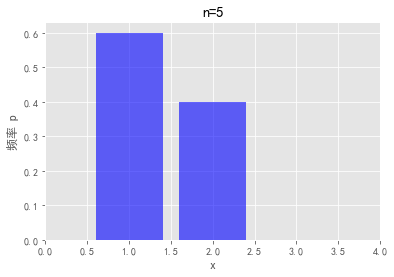

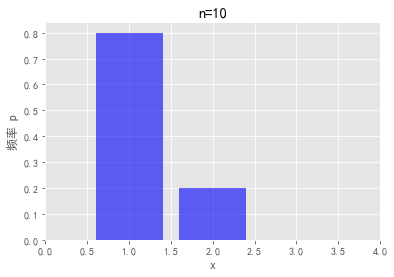

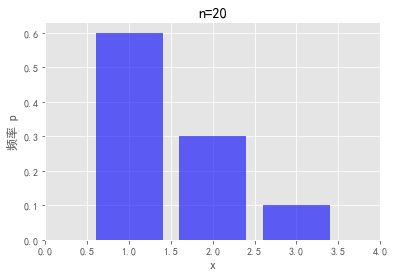

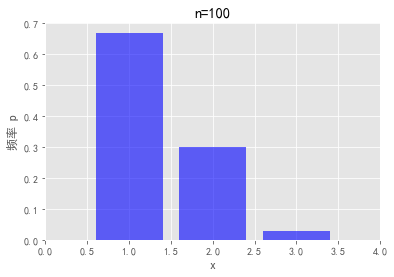

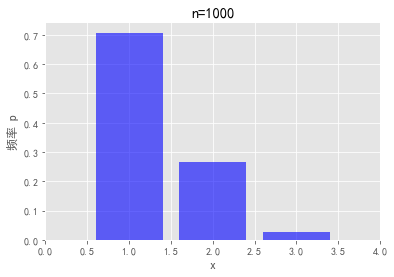

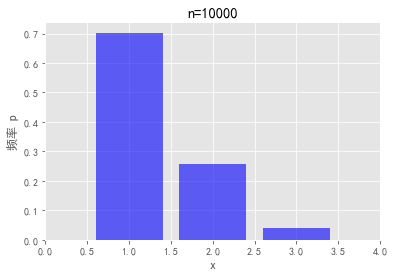

In [10]:
# 最小次序统计量及其分布
from scipy.stats import rv_discrete  # 自定义离散分布
x_k = np.arange(3)+1
p_k = np.array([1/3]*3)
X = rv_discrete(name='min', values=(x_k, p_k))


def Get_Min_Dist(n, X):
    Min_list = []
    for i in range(n):
        min_value = np.min(X.rvs(size=3))
        Min_list.append(min_value)
    # 统计每个值出现的次数
    xk_count = []
    for v in x_k:
        xk_count.append(np.sum(Min_list == v))
    # 画图
    plt.bar(x_k, np.array(xk_count)/n, color='blue', alpha=0.6)
    plt.xlabel("x")
    plt.ylabel("频率 p")
    plt.xlim(0, 4)
    plt.title("n="+str(n))
    plt.show()


Get_Min_Dist(5, X)
Get_Min_Dist(10, X)
Get_Min_Dist(20, X)
Get_Min_Dist(100, X)
Get_Min_Dist(1000, X)
Get_Min_Dist(10000, X)

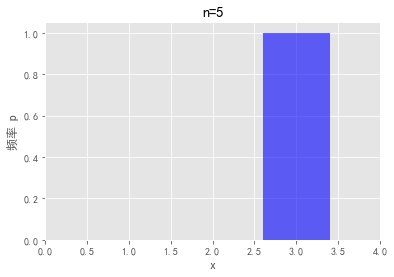

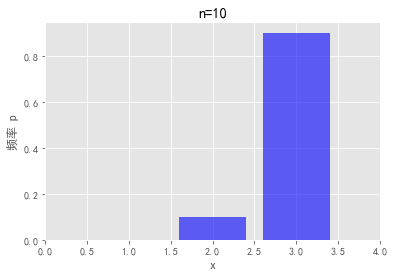

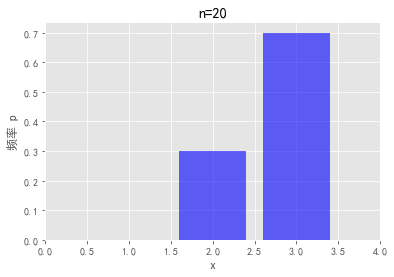

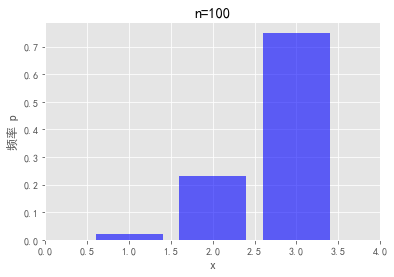

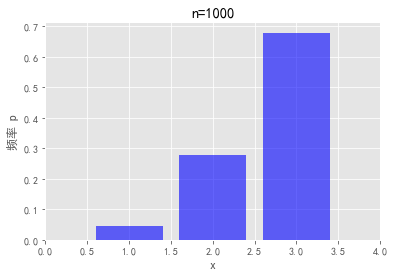

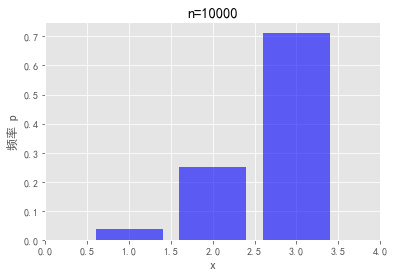

In [11]:
# 最大次序统计量及其分布
from scipy.stats import rv_discrete  # 自定义离散分布
x_k = np.arange(3)+1
p_k = np.array([1/3]*3)
X = rv_discrete(name='min', values=(x_k, p_k))


def Get_Max_Dist(n, X):
    Max_list = []
    for i in range(n):
        max_value = np.max(X.rvs(size=3))
        Max_list.append(max_value)
    # 统计每个值出现的次数
    xk_count = []
    for v in x_k:
        xk_count.append(np.sum(Max_list == v))
    # 画图
    plt.bar(x_k, np.array(xk_count)/n, color='blue', alpha=0.6)
    plt.xlabel("x")
    plt.ylabel("频率 p")
    plt.xlim(0, 4)
    plt.title("n="+str(n))
    plt.show()


Get_Max_Dist(5, X)
Get_Max_Dist(10, X)
Get_Max_Dist(20, X)
Get_Max_Dist(100, X)
Get_Max_Dist(1000, X)
Get_Max_Dist(10000, X)

（1.4）样本分位数与样本中位数及其抽样分布

&emsp;&emsp;在概率论中，我们知道中位数是指累计概率 $p=0.5$ 时对应的随机变量值 $x$，但样本抽样后是一组离散个数的取值，因此，我们定义样本中位数只需要查找抽样后的样本排在中间的那个样品，具体来说：
$$
m_{0.5} = \begin{cases}
x\left(\frac{n+1}{2}\right), & n \text { 为奇数 } \\ 
\left.\dfrac{1}{2} \left(\dfrac{x}{2}\right) + x\left(\dfrac{n}{2}+1\right)\right), & n \text { 为偶数 }
\end{cases}
$$

&emsp;&emsp;若 $n=5$，则 $m_{0.5} = x_{(3)}$；若 $n=6$，则 $m_{0.5} = \dfrac{1}{2}\left(x_{(3)}+x_{(4)}\right)$。

In [12]:
# 从总体/总体的分布中抽取样本并计算样本样本中位数
# （1）从总体中抽取样本
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
             13, 14, 15, 16, 17, 18, 19, 20])   # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_mid = np.median(x_i)  # 计算样本中位数
print("样本中位数为：", x_mid)

样本中位数为： 13.5


In [13]:
# （2）从总体分布中抽取样本，假设总体分布为N（0，1）
x_i = np.random.randn(10)  # 从总体分布N(0,1)中抽取10个样本
x_mid = np.median(x_i)  # 计算样本中位数
print("样本中位数为：", x_mid)

样本中位数为： -0.224165947288453


&emsp;&emsp;接下来，我们来看看样本 $p$ 分位数是什么？

&emsp;&emsp;样本 $p$ 分位数 $m_{p}$ 可如下定义：
$$
m_p = \begin{cases}
x_{([n p+1])}, & \text { 若 } n p \text { 不是整数 } \\ 
\dfrac{1}{2} \left(x_{(n p)}+x_{(n p+1)}\right), & \text { 若 } n p \text { 是整数 }
\end{cases}
$$

&emsp;&emsp;用普通的语言理解就是：先将抽样的 $n$ 个样本按从小到大排序，样本 $p$ 分位数就是排在第 $n \times p$ 位的样品值，当然有可能 $n \times p$不是整数，按上述公式处理。

In [14]:
# 从总体/总体的分布中抽取样本并计算样本样本中位数
# （1）从总体中抽取样本
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
             13, 14, 15, 16, 17, 18, 19, 20])   # 假设总体为X
x_i = np.random.choice(X, 10, replace=False)  # 从总体X中抽取10个样本
x_low = np.percentile(x_i, 25)  # 计算样本下四分位数
x_high = np.percentile(x_i, 75)  # 计算样本上四分位数
print("样本下四分位数为：", x_low)
print("样本上四分位数为：", x_high)

样本下四分位数为： 5.25
样本上四分位数为： 16.0


接下来，我们使用一组实验观察下样本p分位数/样本中位数的抽样分布：  
（a）假设总体为 $X$ ，为了方便起见，$X$ 取$1 \sim 20$；  
（b）对 $X$ 抽取10个样本，计算10个样本的样本中位数；  
（c）重复（b）步骤10次、20次、100次、1000次、10000次、100000次，观察样本中位数的分布；

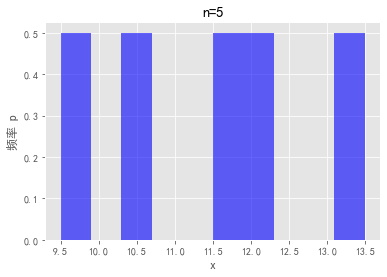

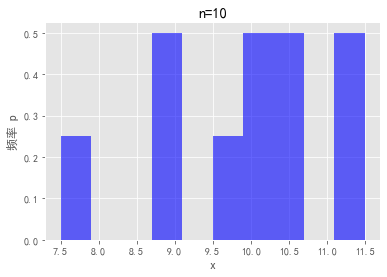

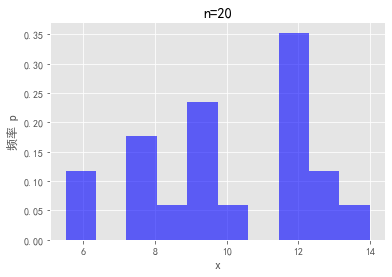

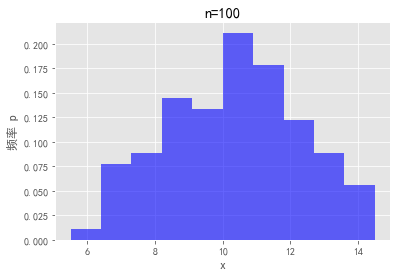

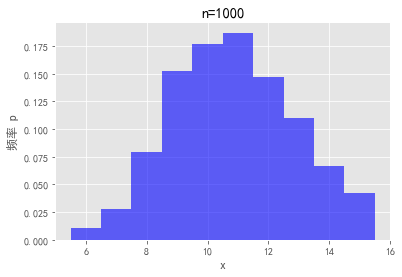

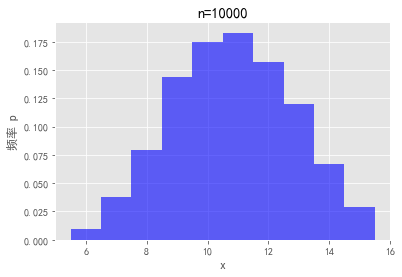

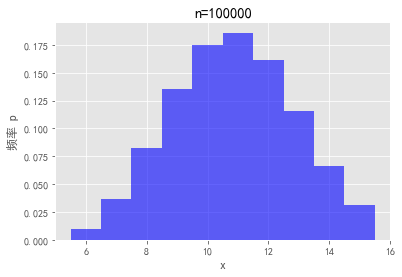

In [15]:
def GetMidDist(n, X):
    x_mid_list = []
    for i in range(n):
        x_i = np.random.choice(X, 10, replace=False)
        x_mid = np.median(x_i)
        x_mid_list.append(x_mid)
    plt.hist(x_mid_list, color='blue', alpha=0.6, density=True)
    plt.xlabel("x")
    plt.ylabel("频率 p")
    plt.title("n="+str(n))
    plt.show()


X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
             15, 16, 17, 18, 19, 20])   # 假设总体为X, size=20
GetMidDist(5, X)
GetMidDist(10, X)
GetMidDist(20, X)
GetMidDist(100, X)
GetMidDist(1000, X)
GetMidDist(10000, X)
GetMidDist(100000, X)

&emsp;&emsp;因此，样本分位数的抽样分布的渐近分布为正态分布，当 $n$ 越来越大时。具体来说：

&emsp;&emsp;设总体密度函数为 $p(x), x_p$ 为其 $p$ 分位数，$p(x)$ 在 $x_p$ 处连续且 $p (x_p) > 0$，则当 $n \rightarrow \infty$ 时样本 $p$ 分位数 $m_{p}$ 的渐近分布为

$$
N\left(x_p, \frac{p (1-p)}{n \cdot p^2 (x_p)} \right) 
$$
&emsp;&emsp;特别地，对于样本中位数来说，当 $n \rightarrow \infty$ 时有
$$
N\left(x_{0.5}, \frac{1}{4 n \cdot p^2 (x_{0.5})} \right) 
$$

（2）三大抽样分布：

&emsp;&emsp;以上关于统计量及其分布的介绍，我们已经学习了几种常用的统计量及其分布，包括：样本均值、样本方差/样本标准差以及分位数/中位数。在这些统计量的构造以及抽样分布的探索上，我们并没有对总体分布的形式进行限定，这是一件好事，也是一件不好的事，因为如果对总体的分布做限定，会得出特定条件下的统计量及其抽样分布，但是会降低使用的广泛性。实际上，有很多实际问题都是以标准正态分布的前提下讨论的，因此，讨论以标准正态分布为总体而构造的统计量及其抽样分布具有广泛的应用。以标准正态分布为总体构造的三个著名统计量：卡方统计量、F 统计量与 t 统计量在实际中有广泛的用途。下面，我们来一一学习！

（2.1）卡方统计量与卡方分布：

&emsp;&emsp;假设 $x_1, x_2, \cdots, x_n$ 是标准正态分布 $N(0,1)$ 为总体抽样的得到的样本（$x_1,x_2,...x_n$ 独立同分布于 $N(0,1)$），则
$$
\chi^2 = x_1^2 + x_2^2 + \cdots + x_n^2
$$
的分布是自由度为 $n$ 的 $\chi^2$ 分布，简称 $\chi^2 \sim \chi^2(n)$，$\chi^2$ 分布的密度函数为：
$$
p(y) = \frac{(1 / 2)^{\frac{n}{2}}}{\Gamma(n / 2)} y^{\frac{n}{2}-1} e^{-\frac{y}{2}}, \quad y > 0
$$

&emsp;&emsp;**可以用一句话记住卡方分布：$n$ 个标准正态分布的平方和是服从自由度为 $n$ 的卡方分布**。

&emsp;&emsp;有同学可能会问，什么是自由度？这个概念不用深究，可以简单理解为可以自由变化的变量个数。有一个例子很好地阐述了自由度的概念：在无偏样本方差 $\displaystyle s^2 = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})^2$ 中，为什么分母是 $n-1$ 而不是 $n$ 呢？是因为在这个式子中只有 $n-1$ 个可以自由变化的变量数，$n$个样本，其中在计算样本均值时需要花费一个方程，即 $\bar{x} = \dfrac{x_1 + x_2 + \cdots + x_n}{n}$，因此样本方差就只剩下 $n-1$ 个自由度了。

&emsp;&emsp;我们使用python画出不同自由度 $n$ 下的密度函数图：

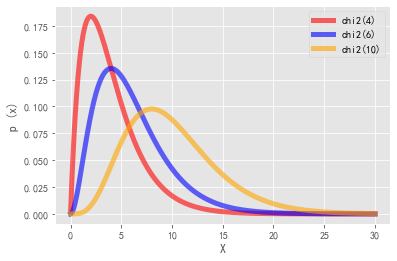

In [16]:
# 使用scipy计算pdf画图(非自定义函数)
from scipy.stats import chi2
x = np.linspace(0.01, 30, 10000)
plt.plot(x, chi2.pdf(x, df=4), 'r-', lw=5, alpha=0.6, label='chi2(4)', c='red')
plt.plot(x, chi2.pdf(x, df=6), 'r-', lw=5,
         alpha=0.6, label='chi2(6)', c='blue')
plt.plot(x, chi2.pdf(x, df=10), 'r-', lw=5,
         alpha=0.6, label='chi2(10)', c='orange')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

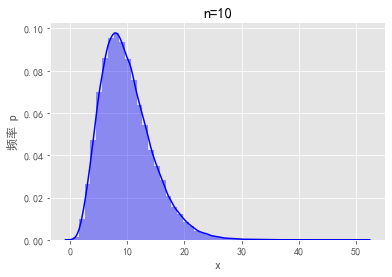

In [17]:
# 使用卡方分布的定义演示卡方分布
from scipy.stats import norm
n = 10
chi2_list = []
for i in range(100000):
    x_i = norm.rvs(loc=0, scale=1, size=10)
    chi2_T = np.sum(np.square(x_i))
    chi2_list.append(chi2_T)
sns.distplot(chi2_list, color='blue')
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("n="+str(n))
plt.show()

&emsp;&emsp;该密度函数的图像是取非负值的偏态分布，其数学期望等于自由度 $n$，方差等于2倍自由度即 $2n$，即 $E (\chi^2) = n, \text{Var}(\chi^2) = 2n$。

&emsp;&emsp;为什么 $\chi^2$ 分布很重要呢？我们在学习样本方差时，一直没有给出样本方差的抽样分布，是因为在不同的总体分布假设下，样本方差的抽样分布都是不一样的，而在正态分布总体假设下，样本方差经过变换可以与卡方分布产生关系，具体来说：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是来自正态总体 $N(\mu, \sigma^2)$ 的样本，其样本均值和样本方差分别为
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i \text { 和 } s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2
$$
那么，$\dfrac{(n-1) s^2}{\sigma^2} \sim \chi^2 (n-1)$。

&emsp;&emsp;我们使用python对这个结论进行验证：

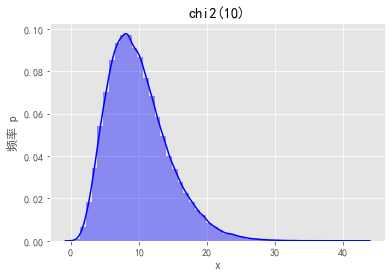

In [18]:
# 假设总体为N（0，1），抽样的样本容量为n=11,抽样的次数为N
from scipy.stats import norm


def S2_Chi2(N):
    mu, sig = 0, 1
    n = 11
    T_list = []
    for i in range(N):
        x_i = norm.rvs(loc=mu, scale=sig, size=n)  # 正态分布总体抽样
        T = (n-1)*np.var(x_i, ddof=1)/sig**2  # 构造卡方统计量
        T_list.append(T)
    sns.distplot(T_list, color='blue')
    plt.xlabel("x")
    plt.ylabel("频率 p")
    plt.title("chi2(10)")
    plt.show()


S2_Chi2(100000)

（2.2）F统计量与F分布：

&emsp;&emsp;设随机变量 $X_1 \sim \chi^2 (m), X_2 \sim \chi^2 (n), X_1$ 与 $X_2$ 独立， 则称 $F= \dfrac{X_1 / m}{X_2 / n}$ 的分布是自由度为 $m$ 与 $n$ 的 $F$ 分布，记为 $F \sim F(m, n)$，其中 $m$ 称为分子自由度，$n$ 称为分母自由度。$F$分布的密度函数为：
$$
p_{F}(y) = \frac{\Gamma\left(\dfrac{m+n}{2}\right)\left(\dfrac{m}{n}\right)^{\frac{m}{2}} y^{\frac{m}{2}-1} \left(1 + \dfrac{m}{n} y\right)^{-\frac{m+n}{2}}}{\Gamma\left(\dfrac{m}{2}\right) \Gamma\left(\dfrac{n}{2}\right)} \cdot
$$

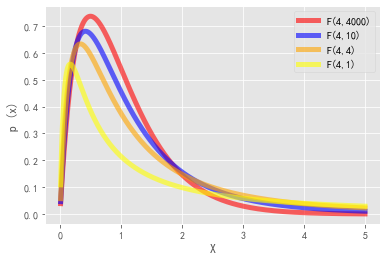

In [19]:
# 使用scipy与matplotlib绘制不同的m，n下的F分布的密度函数
from scipy.stats import f
x = np.linspace(0.01, 5, 10000)
plt.plot(x, f.pdf(x, 4, 4000), 'r-', lw=5,
         alpha=0.6, label='F(4,4000)', c='red')
plt.plot(x, f.pdf(x, 4, 10), 'r-', lw=5, alpha=0.6, label='F(4,10)', c='blue')
plt.plot(x, f.pdf(x, 4, 4), 'r-', lw=5, alpha=0.6, label='F(4,4)', c='orange')
plt.plot(x, f.pdf(x, 4, 1), 'r-', lw=5, alpha=0.6, label='F(4,1)', c='yellow')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

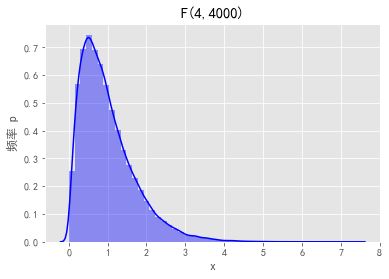

In [20]:
# 使用F统计量的定义演示：
from scipy.stats import norm
m, n = 4, 4000
F_list = []
for i in range(100000):
    chi2_m_sample = np.sum(
        np.square(norm.rvs(loc=0, scale=1, size=m)))  # 卡方m统计量
    chi2_n_sample = np.sum(
        np.square(norm.rvs(loc=0, scale=1, size=n)))  # 卡方n统计量
    F_T = (chi2_m_sample/m) / (chi2_n_sample/n)  # # F（m，n）统计量
    F_list.append(F_T)
sns.distplot(F_list, color='blue')
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("F(4,4000)")
plt.show()

&emsp;&emsp;F分布的密度函数的图像是一个只取非负值的偏态分布。接下来，我们来看看之前学过的样本均值和样本方差与F分布的联系：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_m$ 是来自 $N(\mu_1, \sigma_1^2)$ 的样本，$y_1, y_2, \cdots, y_n$ 是来自 $N(\mu_2, \sigma_2^2)$ 的样本， 且此两样本相互独立，记：
$$
s_x^2 = \frac{1}{m-1} \sum_{i=1}^m (x_i - \bar{x})^2, \quad s_y^2 = \frac{1}{n-1} \sum_{i=1}^n (y_i - \bar{y})^2
$$
其中
$$
\bar{x} = \frac{1}{m} \sum_{i=1}^m x_i, \quad \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$
则有
$$
F = \frac{s_x^2 / \sigma_1^2}{s_y^2 / \sigma_2^2} \sim F(m-1, n-1) 
$$
特别，若 $\sigma_1^2 = \sigma_2^2$， 则 $F = s_x^2 / s_y^2 \sim F(m-1, n-1)$。

&emsp;&emsp;下面，我们使用python模拟这个定理：

<div class="alert alert-warning" role="alert">
注：运行如下代码，时间会很长，请大家不要尝试，只要理解定理即可。
</div>

In [21]:
# x1,x2,...,xn ~ N(0,1), y1,y2,...,yn ~ N(0,4)
# from scipy.stats import norm
# F_list = []
# for i in range(100):
#     x_mu, x_sigma2 = 0, 1
#     y_mu, y_sigma2 = 0, 4
#     norm_xi = norm.rvs(loc=x_mu, scale=x_sigma2, size=5)
#     norm_yi = norm.rvs(loc=y_mu, scale=y_sigma2, size=5)
#     sx_2 = np.var(norm_xi, ddof=1)
#     sy_2 = np.var(norm_yi, ddof=1)
#     F_T = (sx_2/x_sigma2) / (sy_2/y_sigma2)
#     F_list.append(F_list)
# sns.distplot(F_list, color='red')
# plt.xlabel("x")
# plt.ylabel("频率 p")
# plt.title("F(4,4)")
# plt.show()

（2.3）t分布及其统计量：

&emsp;&emsp;设随机变量 $X_1$ 与 $X_2$ 独立且 $X_1 \sim N(0,1), X_2 \sim \chi^2(n)$, 则称 $t = \dfrac{X_1}{\sqrt{X_2 / n}}$ 的分布为自由度为 $n$ 的 $t$ 分布，记为 $t \sim t(n)$。

&emsp;&emsp;下面，我们使用scipy绘制t分布的密度函数：

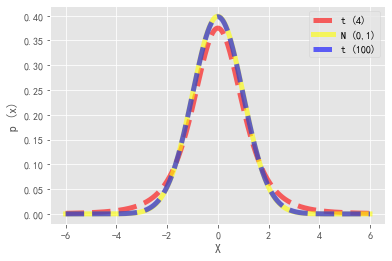

In [22]:
# 使用scipy与matplotlib绘制不同的n下的t分布的密度函数
from scipy.stats import t
from scipy.stats import norm
x = np.linspace(-6, 6, 10000)
plt.plot(x, t.pdf(x, 4), '--', lw=5, alpha=0.6, label='t (4)', c='red')
plt.plot(x, norm.pdf(x, loc=0, scale=1), 'r-', lw=5,
         alpha=0.6, label='N (0,1)', c='yellow')
plt.plot(x, t.pdf(x, 100), '--', lw=5, alpha=0.6, label='t (100)', c='blue')
plt.xlabel("X")
plt.ylabel("p (x)")
plt.legend()
plt.show()

&emsp;&emsp;可以看到：当自由度较大（如 $n \geqslant 30$）时, $t$ 分布可以用 $N(0,1)$ 分布近似（图中 $t(100)$ 几乎与 $N(0,1)$ 重合）。下面，我们使用样本均值和样本方差构造 t 统计量：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是来自正态分布 $N(\mu, \sigma^2)$ 的一个样本， $\bar{x}$ 与 $s^2$ 分别是该样本的样本均值与样本方差， 则有
$$
t = \frac{\sqrt{n}(\bar{x}-\mu)}{s} \sim t(n-1) 
$$

&emsp;&emsp;这个统计量的由来十分具有故事性：在1980年以前，统计学主要的工作是解决社会统计，如人口问题等，后来生物统计问题异军突起，这类问题的主要特点是：数据量一般较大，所用的方法大多数是以中心极限定理为依据的，因此由于中心极限定理总是会联系到正态分布，正态分布在那时候大行其道。皮尔逊认为：正态分布是上帝赐予人类唯一正确的分布类型。到了20世纪初期，越来越多农业、工业试验的统计数据，这些统计数据的特点是：数据量一般不大，没办法使用中心极限定理近似。1898年，酿酒化学技师戈塞特平时的工作接触的数据量很小，只有几个，他通过大量的实验数据发现：$t = \dfrac{\sqrt{n}(\bar{x}-\mu)}{s} \sim t(n-1)$ 的分布与标准正态分布 $N(0,1)$ 并不一致，但是由于数学和统计学功底不够，并不能解决这个问题。于是，他到皮尔逊那里学习，着重研究少量数据的统计分析，在1908年终于以 Student 为笔名发表了有关论文，并提出：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是来自正态分布 $N(\mu, \sigma^2)$ 的一个样本， $\bar{x}$ 与 $s^2$ 分别是该样本的样本均值与样本方差， 则有：$t = \dfrac{\sqrt{n}(\bar{x}-\mu)}{s} \sim t(n-1) $。

&emsp;&emsp;$t$ 分布的发现在统计学史上具有划时代的意义, 因为 $t$ 分布的出现打破了正态分布一统天下的局面，$t$ 分布开创了小样本统计推断的新纪元，小样本统计分析由此引起了广大统计科研工作者的重视。事实上，戈塞特的证明存在着漏洞，费希尔（Fisher）注意到这个问题并于1922年给出了此问题的完整证明。

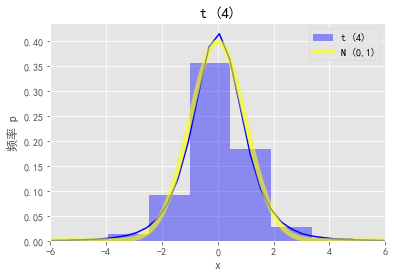

In [23]:
from scipy.stats import norm
from scipy.stats import t
t_list = []
for i in range(300000):
    mu, sigma2 = 0, 1
    x_i = norm.rvs(loc=mu, scale=sigma2, size=5)
    x_mean = np.mean(x_i)
    x_s = np.std(x_i, ddof=1)
    t_T = np.sqrt(4)*(x_mean-mu) / x_s
    t_list.append(t_T)
sns.distplot(t_list, color='blue', label='t (4)')
x = np.linspace(-6, 6, 10000)
plt.plot(x, norm.pdf(x, loc=0, scale=1), 'r-', lw=5,
         alpha=0.6, label='N (0,1)', c='yellow')
plt.xlabel("x")
plt.ylabel("频率 p")
plt.title("t (4)")
plt.xlim(-6, 6)
plt.legend()
plt.show()

### 4 参数估计之点估计的概念

&emsp;&emsp;在之前的学习中，我们主要学习了统计量以及统计量的抽样分布，回到最本质的问题，为什么需要学习统计量呢？引入统计量的目的就是想使用样本信息取推断总体的信息，而统计量只含有样本的信息，不含未知的总体参数。如何对未知的总体进行推断呢？在之前的讨论中，我们知道总体是一个随机变量，而描述随机变量最完整的莫过于随机变量的分布，而在实际中我们感兴趣的多是分布中未知参数有关，如：全中国人的身高服从均值为 $\mu$、方差为$\sigma^2$ 的正态分布 $N(\mu, \sigma^2)$，而总体中的均值 $\mu$、方差 $\sigma^2$ 都是未知的，我们需要在总体中抽样，去估计总体中的未知参数均值$\mu$ 和方差 $\sigma^2$，因此总结下：

&emsp;&emsp;估计：通过样本统计量对总体分布的未知参数进行估计。

&emsp;&emsp;估计的方法包括点估计与区间估计，点估计希望使用一个数估计总体中的位置参数，如 $\mu = 0$ 就是指使用一个数0去估计总体中的参数 $\mu$，而0是由抽样后计算某个样本统计量得来的。区间估计指的是使用一个区间估计总体中的参数，区间估计解决了点估计无法评价估计的精度的问题，关于这一点我们在后面详细看，我们先学习点估计。

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是来自总体的一个样本，用于估计未知参数 $\theta$ 的统计量 $\hat{\theta} = \hat{\theta} (x_1, x_2, \cdots, x_n )$ 称为 $\theta$ 的估计量，或称为 $\theta$ 的点估计，简称估计。

&emsp;&emsp;点估计的方法有很多，接下来主要学习：矩估计和极大似然估计。事实上，还有很多其他的方法进行点估计，如：贝叶斯估计等。

### 5 参数估计之点估计的方法：矩估计

（1）总体矩和中心矩

&emsp;&emsp;在学习矩估计的方法前，我们先来看看什么是矩的概念。对于一个随机变量 $X$ 来说，随机变量 $X$ 的矩可以分为原点矩和中心矩，具体来说：

&emsp;&emsp;设 $X$ 为随机变量，$k$ 为正整数。如果以下的数学期望都存在，则称
$$
\mu_k = E(X^k)
$$
为 $X$ 的 $k$ 阶原点矩。称
$$
\nu_k = E(X-E(X))^k
$$
为 $X$ 的 $k$ 阶中心矩。

&emsp;&emsp;显然，数学期望是随机变量的一阶原点矩，方差是随机变量的二阶中心矩。随机变量的矩是随机变量的一类数字特征，随机变量的原点矩刻画了随机变量 $X$ 偏离原点 $(0,0)$ 的程度，而中心矩描述了随机变量 $X$ 偏离“中心”的程度，可以使用数学期望和方差做类比。

&emsp;&emsp;与此同时，一类常见的统计量就是样本矩，具体来说：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是样本，$k$ 为正整数，则统计量
$$
a_k = \frac{1}{n} \sum_{i=1}^n x_i^k
$$
称为样本 $k$ 阶原点矩。特别地，样本一阶原点矩就是样本均值。统计量
$$
b_k = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^k
$$
称为样本 $k$ 阶中心矩。特别地，样本二阶中心矩就是样本方差。

&emsp;&emsp;下面，我们来看看在python如何计算样本矩：

In [24]:
# 假设总体是标准正态分布，求3阶原点矩和中心矩
from scipy.stats import norm
x_i = norm.rvs(loc=0, scale=1, size=10000)
a3 = np.mean(np.power(x_i, 3))
b3 = np.mean(np.power((x_i-np.mean(x_i)), 3))
print("3阶原点矩：", a3)
print("3阶中心矩：", b3)

3阶原点矩： 0.013479248316904283
3阶中心矩： 0.009774034152086324


（2）矩估计

&emsp;&emsp;1900年，皮尔逊提出了替换原理，具体来说：使用样本矩（样本原点矩和样本中心矩）替换总体矩（原点矩和中心矩），如：使用样本均值$\bar{x}$ 替换总体均值 $E(X)$、使用样本方差 $s^2$ 替换总体方差 $\text{Var}(X)$。

&emsp;&emsp;当然，我们也可以拓展下替换原理就是矩估计，如：使用样本均值 $\bar{x}$ 估计总体均值 $E(X)$、使用样本方差 $s^2$ 估计总体方差$\text{Var}(X)$、用事件的频率估计事件的概率、使用样本分位数估计总体分位数等。

&emsp;&emsp;为什么矩估计能够让人接受呢？原因就是格利纹科定理：使用经验分布函数替换总体分布。

【例子】假设总体服从指数分布，其密度函数为
$$
p(x ; \lambda)=\lambda e^{-\lambda x}, \quad x \geqslant 0
$$
从该总体中抽样1000个样本，估计总体分布的参数 $\lambda$。

**解：**

取 $k=1$，由于 $E(X)=\dfrac{1}{\lambda}$，即 $\lambda = \dfrac{1}{E(X)}$  
因此，$\lambda$ 的矩估计为：$\hat{\lambda} = \dfrac{1}{\bar{x}} $

In [25]:
# 假设真实值lambda = 5
from scipy.stats import expon
real_lmd = 5
x_i = np.random.exponential(scale=1/real_lmd, size=1000)
print("矩估计为：", 1/np.mean(x_i))

矩估计为： 5.035338697700164


### 6 参数估计之点估计的方法：极大似然估计

&emsp;&emsp;极大似然估计的思想非常有意思，充分利用了样本的二重性，即：可以把样本想象成黑盒子，打开前样本是一个随机变量，打开后就是确定的值。具体来说：极大似然估计就是利用已知的样本结果信息，反推最有可能（最大概率）导致这些样本结果出现的模型参数值。下面举例子说明：

&emsp;&emsp;假设我们有一个罐子（总体），罐子里有黑白两色球，假设黑球为记为1，白球记为0，球的比例未知，假设黑球的比例为 $p$，白球的比例为 $1-p$。为了估计总体罐子的参数 $p$，我们对总体进行抽样，采样的结果如下：

$$
1, 1, 0, 1, 1, 1, 0, 0, 1, 1
$$

&emsp;&emsp;为了使用我们的样本信息估计总体参数 $p$，我们计算这组样本出现的概率（似然函数）
$$
\begin{aligned}
P(p) 
&= p\times p\times (1-p) \times p \times p \times p \times (1-p) \times (1-p) \times p \times p \\
&= p^7 \times (1-p)^3
\end{aligned}
$$

&emsp;&emsp;由于不同的$p$会导致样本发生的概率发生改变，可能是“冥冥之中自有天意”，有一股无形的力量迫使我们从总体中采样刚好采到这个样本，因此样本发生的概率应该是最大才对。接下来，我们需要把样本发生的概率最大化：
$$
\max _\limits{p} P(p) = p^7 \times (1-p)^3
$$
&emsp;&emsp;由于直接求解 $n$ 个连乘的式子是十分困难的，但是我们习惯求解加法的式子，因此可以使用对数把以上的式子 $P(p)$ 简化为连加式子$ln(P(p))$（对数似然函数），即：
$$
\ln (P(p)) = 7 \ln(p) \times 3 \ln(1-p)
$$
&emsp;&emsp;最大值的求解需要使用导数的知识，即导函数为0：
$$
\frac{d \ln(P)}{d p} = 0 \\
\frac{7}{p}-\frac{3}{1-p} = 0\\
p = 0.7
$$
&emsp;&emsp;求解的最大值对应的 $p=0.7$ 就是我们所要估计的 $p$。

&emsp;&emsp;下面我们使用python求解：

In [26]:
# 使用sympy演示极大似然估计的案例
from sympy import *
p = Symbol('p')  # 定义总体参数
P_p = p**7*(1-p)**3  # 定义似然函数
lnP_p = ln(P_p)  # 化简为对数似然
d_ln_P = diff(lnP_p, p)  # 求导函数
p_hat = solve(d_ln_P, p)  # 导函数为0
print("p的极大似然估计为：", p_hat)

p的极大似然估计为： [7/10]


&emsp;&emsp;下面，我们来实践一个更加有意义的案例：对正态总体 $N(\mu, \sigma^2), \theta=(\mu, \sigma^2)$ 是二维参数，设有样本 $x_1, x_2, \cdots, x_n$，求总体参数 $\mu$ 和 $\sigma^2$。
$$
L(\mu, \sigma^2) = \prod_{i=1}^n \left(\frac{1}{\sqrt{2 \pi} \sigma} \exp \left\{-\frac{(x_i - \mu)^2}{2 \sigma^2} \right\}\right) = (2 \pi \sigma^2)^{-\frac{n}{2}} \exp \left\{-\frac{1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2 \right\} \\
\ln L (\mu, \sigma^2) = -\frac{1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2 - \frac{n}{2} \ln \sigma^2 - \frac{n}{2} \ln (2 \pi)
$$

&emsp;&emsp;为了求解对数似然函数的最大化，需要$\ln L(\mu, \sigma^2)$对 $\mu$ 和 $\sigma^2$ 求偏导函数，然后求偏导函数的零点。
$$
\frac{\partial \ln L (\mu, \sigma^2)}{\partial \mu}=\frac{1}{\sigma^2} \sum_{i=1}^n (x_i - \mu) = 0 \\
\frac{\partial \ln L (\mu, \sigma^2)}{\partial \sigma^2} = \frac{1}{2 \sigma^4} \sum_{i=1}^n (x_i - \mu)^2 - \frac{n}{2 \sigma^2} = 0
$$
&emsp;&emsp;解这个方程组，就可以得到：
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i = \bar{x}
$$
&emsp;&emsp;和
$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2 = s_n^2
$$
&emsp;&emsp;我们可以惊讶地发现，正态分布的 $\mu$ 和 $\sigma^2$ 的极大似然估计竟然是样本均值 $\bar{x}$ 和有偏样本方差 $s_n^2$，这就将我们的估计与统计量连接起来了。**一般来说，估计的结果都与从该分布抽样的样本组成的样本统计量有关，如样本均值 $\bar{x}$ 样本方差 $s^2$** 等等。

【例子】指数分布通常用来描述事件之间的时间，假如在银行排队，每个客户排队的等待时间服从参数为 $\lambda$ 的指数分布。指数分布的密度函数为：
$$
p(x)=\left\{\begin{array}{r}
\lambda e^{-\lambda x}, x \geqslant 0 \\
0, x<0
\end{array}\right.
$$
&emsp;&emsp;参数 $\lambda$ 代表发生率，如：$\lambda=1$ 代表平均每分钟有1个人完成服务，$\lambda=2$ 代表平均1分钟有两位客户完成服务，$\lambda=0.5$ 代表每2分钟有1位客户完成服务（也可以说是每分钟有0.5位客户完成服务。）

&emsp;&emsp;为了估计银行的服务速度，我们随机在银行的客户进行抽样，询问本次服务的时间长度，得到5位客户的回答：$x_1=2, x_2=3, x_3=0.5, x_4=5, x_5=2$，下面我们使用极大似然估计去估计总体分布（指数分布）中的参数 $\lambda$。

**解：**

&emsp;&emsp;似然函数：
$$
L(\lambda|x_1,x_2,\cdots, x_5) = \lambda^n e^{-\lambda (x_1 + x_2 + \cdots + x_5)}
$$
&emsp;&emsp;对数似然函数为：
$$
\ln ( L(\lambda|x_1,x_2,\cdots,x_5)) = 5 \log (\lambda) - \lambda (x_1 + x_2 + \cdots + x_5)
$$
&emsp;&emsp;对数似然函求导：
$$
\frac{d \ln(L(\lambda|x_1,x_2,\cdots, x_5))}{d \lambda} = n \frac{1}{\lambda} - (x_1 + x_2 + \cdots + x_5)
$$
&emsp;&emsp;导函数为0：
$$
n \frac{1}{\lambda}- (x_1 + x_2 + \cdots + x_5) = 0 \\
\lambda = \frac{n}{x_1 + x_2 + \cdots + x_5} = \frac{1}{\bar{x}}
$$

In [27]:
from sympy.abc import lamda
x_1, x_2, x_3, x_4, x_5 = symbols('x_1:6')  # 定义多个样本变量
x_1, x_2, x_3, x_4, x_5 = 2, 3, 0.5, 5, 2
f_lmd = lamda*E**(-lamda*x_1) * lamda*E**(-lamda*x_2) * lamda * \
    E**(-lamda*x_3) * lamda*E**(-lamda*x_4) * lamda*E**(-lamda*x_5)  # 定义似然函数
ln_f_lmd = ln(f_lmd)  # 定义对数似然函数
d_ln_f = diff(ln_f_lmd, lamda)  # 求导
lmd_hat = solve(d_ln_f, lamda)  # 导数为0
print("指数分布参数lamda的极大似然估计值为：", lmd_hat)
print("指数分布参数lamda的极大似然公式求解为：", 5 / (x_1+x_2+x_3+x_4+x_5))

指数分布参数lamda的极大似然估计值为： [0.400000000000000]
指数分布参数lamda的极大似然公式求解为： 0.4


&emsp;&emsp;因此，$\lambda=0.4$ 表示银行队伍每分钟有0.4位客户完成服务，也就是说银行队伍2.5分钟有1人完成服务。

### 7 参数估计之点估计的评价：无偏性与有效性

&emsp;&emsp;在前面的案例中，可以发现：正态分布 $N(\mu, \sigma^2)$ 的极大似然估计的估计统计量为样本均值 $\bar{x}$ 和有偏样本方差 $s_n^2$，而指数分布的参数 $\lambda$ 的极大似然估计的估计统计量为 $\dfrac{1}{\bar{x}}$，因此如何构造统计量去估计总体参数并没有一个明确的规定。换句话来说，对于同一个总体参数的估计统计量的构造方式多种多样，那么如何评价这些统计量的估计好坏呢？下面给出两个准则，分别是：无偏性和有效性。

（1）无偏性：

&emsp;&emsp;使用某个统计量估计总体参数时，由于样本具有随机性，统计量始终与总体参数有一定的差距，这种差距时而偏大，时而偏小，但是平均起来统计量与总体参数之间的差距为0。可以想像成一个箭靶，箭靶中心是总体参数，我们最想要的就是一击必中靶心，但是由于各种因素，我们每次实际的射击（统计量）与实际靶心有一定的差距，有时射出的箭位于靶心上方，有时射出的箭位于靶心的下方，但是平均起来这种差距会被抵消为0。即：

&emsp;&emsp;设 $\hat{\theta} = \hat{\theta} (x_1, x_2, \cdots, x_n)$ 是 $\theta$ 的一个估计，$\theta$ 的参数空间为 $\Theta$，若对任意的 $\theta \in \Theta$，有
$$
E_{\theta}(\hat{\theta}) = \theta,
$$
则称 $\hat{\theta}$ 是 $\theta$ 的无偏估计，否则称为有偏估计。

<div>
<img src="./images/15.png" width="100" align="middle"/>
<img src="./images/16.png" width="100" align="middle"/>
</div>

&emsp;&emsp;左图代表无偏，右图则是有偏估计。

（2）有效性：

&emsp;&emsp;对于同一个总体参数的估计统计量的构造方式多种多样，同时对于同一个总体参数的无偏估计也有很多个统计量进行估计，因此如何从众多的无偏估计统计量中选择合适的统计量估计总体参数呢？其实，最直观的方式是：如果该统计量围绕总体分布的参数值波动越小越好，因此波动越小，由于随机性导致的统计量每次估计总体分布参数时不会差别太大。波动可以使用方差来衡量，可以选择无偏估计的统计量中方差最小的统计量作为最有效的统计量。具体来说：

&emsp;&emsp;设 $\hat{\theta}_1, \hat{\theta}_2$ 是 $\theta$ 的两个无偏估计， 如果对任意的 $\theta \in \Theta$ 有
$$
\text{Var}(\hat{\theta}_{1}) \leqslant \text{Var}(\hat{\theta}_2)
$$
且至少有一个 $\theta \in \Theta$ 使得上述不等号严格成立，则称 $\hat{\theta}_1$ 比 $\hat{\theta}_2$ 有效。

<div>
<img src="./images/17.png" width="200" align="middle"/>
</div>

&emsp;&emsp;左图的统计量比右图的统计量更有效。

【例子】我们使用一个案例说明无偏性和有效性的重要性：

&emsp;&emsp;在正态分布 $N(\mu, \sigma^2)$ 估计数学期望 $\mu$ 时，使用极大似然估计的结果为 $\bar{x}$。除此以外，我们也能使用第一个样本 $x_1$ 估计 $\mu$，当然也能使用样本统计量的最小值作为 $\mu$ 的估计，下面我们使用python看看这几种方式的无偏性和有效性：

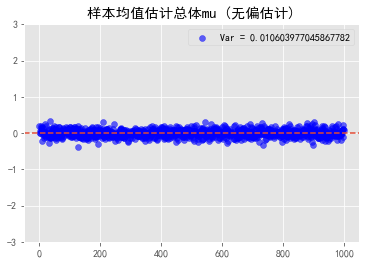

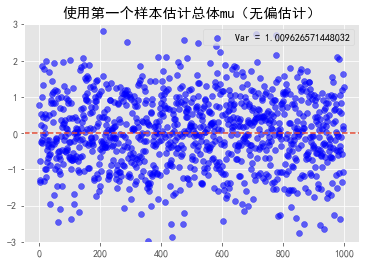

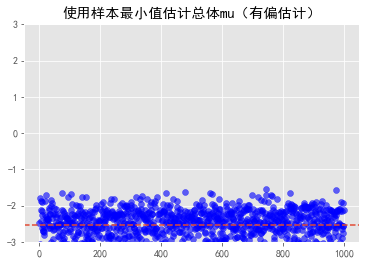

In [28]:
# 使用三种估计统计量估计标准正态总体的参数mu=0，试验次数为1000次，每次抽100个样品
N = 1000
# 使用样本均值估计正态总体的参数mu
mean_list = []
for i in range(1000):
    x_i = np.random.randn(100)
    x_mean = np.mean(x_i)
    mean_list.append(x_mean)
E_x_mean = np.mean(mean_list)
Var_x_mean = np.var(mean_list)
plt.scatter(np.arange(N)+1, np.array(mean_list), color='b',
            alpha=0.6, label='Var = '+str(Var_x_mean))
plt.axhline(y=E_x_mean, ls='--')
plt.ylim(-3, 3)
plt.title("样本均值估计总体mu (无偏估计)")
plt.legend()
plt.show()

# 使用第一个样本估计正态总体的参数mu
x1_list = []
for i in range(1000):
    x_i = np.random.randn(100)
    x1 = x_i[0]
    x1_list.append(x1)
E_x_1 = np.mean(x1_list)
Var_x_1 = np.var(x1_list)
plt.scatter(np.arange(N)+1, np.array(x1_list), color='b',
            alpha=0.6, label='Var = '+str(Var_x_1))
plt.axhline(y=E_x_1, ls='--')
plt.ylim(-3, 3)
plt.title("使用第一个样本估计总体mu（无偏估计）")
plt.legend()
plt.show()

# 使用最小值估计正态总体的参数mu
xmin_list = []
for i in range(1000):
    x_i = np.random.randn(100)
    x_min = np.min(x_i)
    xmin_list.append(x_min)
E_x_min = np.mean(xmin_list)
plt.scatter(np.arange(N)+1, np.array(xmin_list), color='b', alpha=0.6)
plt.axhline(y=E_x_min, ls='--')
plt.ylim(-3, 3)
plt.title("使用样本最小值估计总体mu（有偏估计）")
plt.show()

&emsp;&emsp;在以上的三种估计方式中，由于标准正态分布的 $\mu=0$，因此，使用样本均值和使用第一个样本估计正态总体 $\mu$ 是无偏估计，而使用样本最小值估计正态总体 $\mu$ 则是有偏的；在使用样本均值和使用第一个样本估计正态总体 $\mu$ 的两种无偏估计方法中，使用样本均值估计正态总体 $\mu$ 的方差显著小于使用样本最小值估计正态总体 $\mu$。事实上，$\text{Var}(\bar{x}) = \dfrac{\sigma^2}{n}$ 而 $\text{Var}(x_1) = \sigma^2$，$n$为样本量。因此，使用样本均值估计正态总体 $\mu$ 总是无偏且有效的！

### 8 参数估计之区间估计（了解）

&emsp;&emsp;参数的点估计是使用一个具体的数值（统计量）估计总体分布的参数值，这样做的有点就是方便计算与方便使用，但是点估计的精度如何，点估计本身是无法回答的。解决这个问题一个比较复杂的方法是：构造统计量的分布（即抽样分布），然后使用一个区间估计总体分布的参数，这就是区间估计。设 $\theta$ 是总体的一个参数，$x_1, x_2, \cdots, x_n$ 是抽样的样本，区间估计就是要找到两个统计量 $\hat{\theta}_L = \hat{\theta}_L (x_1, x_2, \cdots, x_n)$ 和 $\hat{\theta}_U = \hat{\theta}_{U} (x_1, x_2, \cdots, x_n)$，使得 $\hat{\theta}_L < \hat{\theta}_U$，在得到样本观测值之后， 就把 $\theta$ 估计在区间 $[\hat{\theta}_L, \hat{\theta}_V]$ 内。样本是具有随机性的，区间 $[\hat{\theta}_L, \hat{\theta}_V]$ 盖住未知参数 $\theta$ 的可能性并不确定，人们通常要求区间 $[\hat{\theta}_L, \hat{\theta}_V]$ 盖住 $\theta$ 的概率 $P(\hat{\theta}_L \leqslant \theta \leqslant \hat{\theta}_U)$ 尽可能大，但是只要无限增大区间的范围就好了，然后区间越小是估计得越好的。为解决此矛盾，把区间 $[\hat{\theta}_L, \hat{\theta}_V]$ 盖住 $\theta$ 的概率（以后称为置信水平）事先给定。

&emsp;&emsp;下面给出区间估计的完整概念（如果看不懂可以直接看例子）：

&emsp;&emsp;设 $\theta$ 是总体的一个参数，其参数空间为 $\Theta, x_1, x_2, \cdots, x_n$ 是来自该总体的样本, 对给定的一个 $\alpha(0<\alpha<1)$，假设有两个统计量 $\hat{\theta}_L = \hat{\theta}_L (x_1, x_2, \cdots, x_n)$ 和 $\hat{\theta}_U= \hat{\theta}_U(x_1, x_2, \cdots, x_n)$，若对任意的 $\theta \in \Theta$，有
$$
P_{\theta}(\hat{\theta}_L \leqslant \theta \leqslant \hat{\theta}_U) \geqslant 1 - \alpha
$$
则称随机区间 $[\hat{\theta}_L, \hat{\theta}_V]$ 为 $\theta$ 的置信水平为 $1-\alpha$ 的置信区间，或简称 $[\hat{\theta}_L, \hat{\theta}_V]$ 是 $\theta$ 的 $1 - \alpha$ 置信区间，$\hat{\theta}_L$ 和 $\hat{\theta}_U$ 分别称为 $\theta$ 的 (双侧) 置信下限和置信上限。

&emsp;&emsp;那么，我们如何通过样本构造一个置信区间呢？如果按照理论来说，应该是枢轴量法，但是这个方法比较复杂而且在很多种情况下都不怎么快速可行（有兴趣可以去了解）。下面，我推荐一种简便的方法简单快速构造置信区间，这个方法叫做`bootstrap`方法。

&emsp;&emsp;假设我们想要通过某个统计量 T 估计总体参数，置信水平为 $1-\alpha$。从总体中抽样 $x_1,x_2,...,x_n$，只需要在样本中继续抽样（重抽样），每次抽样计算一次统计量 T，这样就可以构造一个抽样分布，取抽样分布的 $\dfrac{\alpha}{2}$ 分位数点和 $1 - \dfrac{\alpha}{2}$分位数点作为区间左右边界即可。

In [29]:
# 使用bootstrap方法计算N(0,1)的mu的置信区间：样本量为1000，重抽样样本量为500, 重抽样的次数为100000次
T_list = []
N, N_re = 1000, 500
total_times = 10000
alpha = 0.05
x_i = np.random.randn(N)  # 抽样1000个
for i in range(total_times):
    x_re = np.random.choice(x_i, N_re, replace=True)  # 从样本中重抽样
    T = np.mean(x_re)
    T_list.append(T)
left = np.percentile(np.array(T_list), 100*alpha/2)
right = np.percentile(np.array(T_list), 100*(1-alpha/2))
print("正态总体的mu的置信区间为：["+str(left)+", "+str(right)+"]")

正态总体的mu的置信区间为：[-0.006847512380540255, 0.16414289736205737]


&emsp;&emsp;现在反问大家，置信区间的置信水平是什么意思呢？一个样本可以构造一个置信区间，类似地， 我们也可以给出100个这样的区间，这100个区间中有50个包含参数真值，另外50个不包含参数真值。这是置信水平 $1 - \alpha = 0.50$ 的一个合理解释。当然，若换100个样本，也不一定正好50%包含真值，可能49个也可能51个，都是合理的。

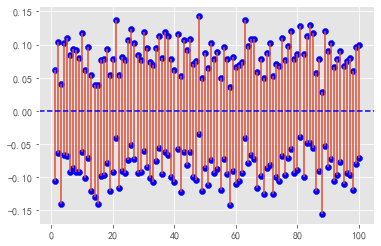

In [30]:
# 探索置信度1-alpha的含义：
def get_confident_interval(x_i):
    T_list = []
    N, N_re = 1000, 500
    total_times = 10000
    alpha = 0.05
    x_i = np.random.randn(N)
    for i in range(total_times):
        x_re = np.random.choice(x_i, N_re, replace=True)  # 从样本中重抽样
        T = np.mean(x_re)
        T_list.append(T)
    left = np.percentile(np.array(T_list), 100*alpha/2)
    right = np.percentile(np.array(T_list), 100*(1-alpha/2))
    return {'left': left, 'right': right}


left_right_list = []  # 100个置信区间的列表
for i in range(100):
    x_i = np.random.randn(1000)  # 每次抽样1000个样本
    T_i = get_confident_interval(x_i)
    left_right_list.append(T_i)
for i in range(len(left_right_list)):
    plt.vlines(x=i+1, ymin=left_right_list[i]
               ['left'], ymax=left_right_list[i]['right'])
    plt.scatter(np.array([i+1]*2), np.array([left_right_list[i]
                ['left'], left_right_list[i]['right']]), color='blue')
plt.axhline(y=0, ls='--', color='b')
plt.show()

### 9 假设检验之基本思想

（1）假设检验的基本概念：

&emsp;&emsp;前面的内容，我们学习了统计学中的重要内容：估计，估计是使用样本统计量估计总体参数的一种方法。现在，我们来学习统计学的另一个重要主题：假设检验，是对某一个说法做出检验，提出这个说法是正确还是错误。下面通过一个案例对假设检验的概念做一个叙述，这个案例就是鼎鼎大名的“女士品茶”的案例：

&emsp;&emsp;在一个风和日丽的下午，有一群人正在喝奶茶，其中包括了鼎鼎大名的费希尔。我们知道奶茶是由牛奶和茶按照一定比例混合而成的，其中，有一个女士声称自己可以判断奶茶是先放奶再放茶还是先放茶再放奶。费希尔提议做一个实验来检测她是否有这个能力，那么该命题就变成了：

$$
\text{假设}H_0 : \text{该女士不具备鉴别能力} \quad VS \quad \text{假设}H_1 : \text{该女士具备鉴别能力}
$$

&emsp;&emsp;他准备了10杯奶茶给这位女士品尝，结果女士10杯奶茶都答对了！这时，应该对此做出怎样的判断呢，是接受$H_0$还是拒绝$H_0$而接受$H_1$呢？这就是假设检验的主要内容：给出一个命题，给出命题是接受还是拒绝。

（2）假设检验的步骤：

&emsp;&emsp;为了介绍假设检验的步骤，我们将使用一个例子给大家讲明白！某生产肉类的工厂生产肉类的质量服从正态分布 $N(\theta, 1)$（总体），其中$\theta$ 设计值不低于1kg。为了保证肉类没有偷工减料，工厂每天都要对肉类的生产质量做抽样检查，检查肉类的平均质量不低于1kg。某天，从生产的肉类产品抽查10个产品，测量其质量为 $x_1,x_2,...,x_{10}$，样本均值为 $\bar{x} = 0.96$ kg，问该天生产的肉类是否偷工减料？

**分析：**

（2.1）建立假设：

&emsp;&emsp;我们需要回答的问题是：命题“肉类的平均质量不低于1kg”回答“是”还是“否”？因此，回答该命题需要正确需要确定以下两个集合：

$$
\Theta_0 = \{\theta: \theta \geqslant 1\}, \quad \Theta_1 = \{\theta: \theta<1\}
$$

&emsp;&emsp;命题成立对应于$\theta \in \Theta_0$，而命题不成立对应于$\theta \in \Theta_1$。

&emsp;&emsp;因此，假设就简化为：$H_0: \theta \in \Theta_0 \quad \text{VS} \quad H_1: \theta \in \Theta_1$，用以上案例来说就是$H_0: \theta \in \Theta_0 = \{\theta: \theta \geqslant 1\} \quad \text{VS} \quad H_1: \theta \in \Theta_1 = \{\theta: \theta<1\}$，简写为：
$$
H_0: \theta \geqslant 1 \text { VS } H_1: \theta < 1
$$

（2.2）选择统计量并给出拒绝域的形式：

&emsp;&emsp;问题的原假设 $H_0$ 与备择假设 $H_1$ 是关于总体的假设，我们需要使用样本信息推断总体的假设是否是正确的，老套路就是使用统计量将所有样本的信息汇总成一个具体的数值，如：$x_1,x_2,...,x_n$ 浓缩成 $\bar{x}$。我们可以想像成有两个空间，一个能让我们通过样本信息拒绝原假设的拒绝域 $W$，另一个是让我们通过样本信息接受原假设的接受域 $\bar{W}$，拒绝域 $W$ 和接受域 $\bar{W}$ 都是可以通过样本信息构造出来的。因此，如果（检验）统计量落在拒绝域 $W$ 则拒绝原假设，相反如果落在接受域 $\bar{W}$ 则接受原假设，但是拒绝域 $W$ 和接受域 $\bar{W}$ 的构造方式目前还未知！接下来，我们使用上述的例子构造拒绝域：

&emsp;&emsp;由于我们的原假设是正态总体的数学期望 $\theta \ge 1$，因此样本均值 $\bar{x}$ 是一个不错的统计量。如果正态总体的数学期望 $\theta$ 越大，$\bar{x}$ 越大则支持原假设的力度就会越大，反之 $\bar{x}$ 越小则越拒绝原假设。因此，当 $\bar{x}$ 小到一定的程度，就拒绝原假设，拒绝域的形式也随之出来：
$$
W = \{(x_1, x_2, \cdots, x_n): \bar{x} \leqslant c\} = \{\bar{x} \leqslant c\}
$$
其中，$c$ 是未确定的。

&emsp;&emsp;当拒绝域确定以后，如果某次的样本统计量位于拒绝域 $W$ 则拒绝原假设，如果某次的统计量位于接受域 $\bar{W}$ 则接受原假设。

（2.3）选择显著性水平：

&emsp;&emsp;由于样本具有随机性，因此每次抽样的统计量的值都不一样，因此某次抽样的样本统计量可能会位于拒绝域，也有可能位于接受域。换句话说，由于样本的随机性，该次检验可能会犯错，犯错的类型有两种：

| 观测数据情况 | 总体情况 | |
| :---: | :---: | :---: |
|  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; | $H_{(0)}$ 为真 | $H_{(1)}$ 为真 |
| $(x_{(1)},x_{(2)},\cdots,x_{(n)})\in W$ | 犯第一类错误 | 正确 |
| $(x_{(1)},x_{(2)},\cdots,x_{(n)})\in \bar{W}$ | 正确 | 犯第二类错误 |

&emsp;&emsp;当 $\theta \in \Theta_0$ 时，样本由于随机性却落入了拒绝域 $W$，于是我们采取了拒绝 $H_0$ 的错误决策，称这样的错误为第一类错误。

&emsp;&emsp;当 $\theta \in \Theta_1$ 时，样本却落入了接受域 $\bar{W}$，于是我们采取了接受 $H_0$ 的错误决策，称这样的错误为第二类错误。

&emsp;&emsp;既然会犯两类错误，我们可以计算犯两类错误的概率，即：
- 犯第一类错误概率: $\alpha(\theta) = P_{\theta}\{X \in W\}, \theta \in \Theta_0$。
- 犯第二类错误概率: $\beta(\theta) = P_{\theta}\{X \in \bar{W}\}, \theta \in \Theta_1$。

&emsp;&emsp;接下来的任务就很简单啦，能不能同时减少两类错误的概率呢？答案是不能，这两类错误相互制约，一类错误的增加必然减少另一类错误的减少。因此，我们选择仅限制一类错误发生的概率，如：令$\alpha(\theta) = \alpha \leqslant 0.05$

（2.4）给出拒绝域：

&emsp;&emsp;由于我们需要限制一类错误的概率小于等于0.05，即：$\alpha(\theta) = P_{\theta}\{X \in W\} \leqslant 0.05$，而拒绝域为 $W=\{(x_1, x_2, \cdots, x_n): \bar{x} \leqslant c\} = \{\bar{x} \leqslant c\}$，因此只需要让 $c$ 等于 $\bar{x}$ 的分布的0.05分位数点即可。

&emsp;&emsp;以上为理论介绍部分，如果大家只需要假设检验的一般步骤，在这里给大家总结：
- 建立原假设于备择假设
- 选择合适的统计量解决检验问题
- 写出拒绝域的形式和显著性水平（一类错误的概率$\alpha$）
- 计算拒绝域边界的统计量分布的分位数
- 观察统计量值是否位于拒绝域，位于拒绝域则拒绝原假设，否则接受原假设

<div>
<img src="./images/18.png" width="300" align="middle"/>
</div>

&emsp;&emsp;下面，我们使用python模拟以上的过程：

In [31]:
# python模拟以上的假设检验：
from scipy.stats import norm
x_i = np.array([1.0, 0.85, 0.90, 0.98, 0.96, 1.0, 0.97,
               0.98, 0.98, 0.98])  # 从当天生产的肉类总体中抽样10个
x_mean = np.mean(x_i)  # 构造样本均值统计量
# 总体N(theta, 1)，则样本均值的抽样分布为N(theta, 1/n)，n为样本量
c = norm(loc=1, scale=np.sqrt(1/10)).ppf(0.05)
print("样本均值为：", x_mean)
print("拒绝域为：（-inf， "+str(c)+"]")
print("x_mean位于接受域，接受原假设！")

样本均值为： 0.9600000000000002
拒绝域为：（-inf， 0.4798516121244424]
x_mean位于接受域，接受原假设！


### 10 假设检验之正态总体参数的假设检验

&emsp;&emsp;在现实生活中，正态分布都是一个十分重要的分布，很多实际的数学模型都是建立在正态分布的基础上的，因此对正态分布的参数 $\mu$ 和$\sigma^2$ 的检验就十分重要。下面，我们对正态总体的参数 $\mu$ 和 $\sigma^2$ 的各种检验做讨论：

（1）单个正态总体**均值**的检验：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是来自 $N(\mu, \sigma^2)$ 的样本，关于 $\mu$ 的检验问题有以下三种：

i. $H_0: \mu \leqslant \mu_0$ vs $H_1: \mu > \mu_0$  
ii. $H_0: \mu \geqslant \mu_0$ vs $H_1: \mu < \mu_0$  
iii. $H_0: \mu=\mu_0$ vs $H_1: \mu \neq \mu_0$

其中 $\mu_0$ 是已知常数。

&emsp;&emsp;由于正态总体含两个参数，而总体方差 $\sigma^2$ 是否对检验会产生很大影响，因此下面我们将分成方差已知和方差未知两种情况：

（a）$\sigma = \sigma_0$ 已知时的 $u$ 检验：
- 写出原假设与备择假设：$H_0: \mu \leqslant \mu_0$ vs $H_1: \mu > \mu_0$
- 构造合适的统计量：$u = \dfrac{\bar{x} - \mu_0}{\sigma_0 / \sqrt{n}} \sim N(0,1)$。
- 写出拒绝域的形式：$W_1 = \{(x_1, x_2, \cdots, x_n): u \geqslant c\}$，取 $\alpha=0.05$；
<div>
<img src="./images/19.png" width="200" align="middle"/>
</div>
- 计算统计量分布的分位数：$u_{1 - \alpha} = u_{0.95}$
- 计算样本统计量，并观察统计量是否落在拒绝域。

【例子】某条公路上的汽车速度是服从正态分布 $N(\mu, 0.4^2)$ 的随机变量，现在从这条公路上随机抽样10辆车，记录速度分别为：

$$
60, \quad 72, \quad 67, \quad 89, \quad 90, \quad 100, \quad 67, \quad 76, \quad 87, \quad78
$$

附近居民猜测此公路的速度为65，问是否能接受这个猜测。

**解：**
- 写出原假设与备择假设：$H_0: \mu=65 $ vs $ H_1: \mu \neq 65$；
- 构造合适的统计量：$u=\dfrac{\bar{x} - 65}{0.4 / \sqrt{10}} \sim N(0,1)$；
- 写出拒绝域的形式：$W = \{u \leqslant u_{\alpha/2},u \geqslant u_{1-\alpha/2} \},\alpha=0.05$
<div>
<img src="./images/20.png" width="200" align="middle"/>
</div>
- 计算统计量分布的分位数：$u_{1- \alpha/2} = u_{0.975} = 1.96, u_{\alpha/2} = u_{0.025} = -1.96$
- 计算样本统计量：$u = \dfrac{78.6-65}{0.4 / \sqrt{10}} = 107.517$，位于拒绝域，拒绝原假设！（认为不能接受居民的猜测）

In [32]:
# 使用python模拟u检验：
from scipy.stats import norm
mu_0, sigma = 65, 0.4
x_i = np.array([60, 72, 67, 89, 90, 100, 67, 76, 87, 78])  # 样本
u_T = (np.mean(x_i) - mu) / (sigma / np.sqrt(len(x_i)))  # 计算样本统计量
left = norm(loc=0, scale=1).ppf(0.025)
right = norm(loc=0, scale=1).ppf(0.975)
print("拒绝域为：["+str(left)+","+str(right)+"]")
print("u统计量为：", u_T)
print("u_T位于拒绝域，拒绝原假设！")

拒绝域为：[-1.9599639845400545,1.959963984540054]
u统计量为： 621.3875602230866
u_T位于拒绝域，拒绝原假设！


（b）$\sigma$未知的单样本 t 检验：

&emsp;&emsp;u检验（z检验）完成的是当总体方差已知条件下的单个正态总体均值的检验，在实际中大多数情况下，总体方差都是未知的。因此，当总体方差未知时，u检验（z检验）将失效，取而代之的是 t 检验。下面以一个例子说明 t 检验的基本流程：

【例子】某工厂生产以发光产品，发光产品的发光时长服从正态分布 $N(\mu, \sigma^2)$，产品的发光时长设定均值为250h。现在从一批产品中抽取10个产品，测得发光时长为（单位为：h）：

$$
248.8,\quad 249.2,\quad 250.7,\quad 251.2,\quad 248.0,\quad 253.0,\quad 248.9,\quad 250.2,\quad 251.2,\quad 249.2
$$

问：该厂的发光产品是否符合要求？

**解：**

&emsp;&emsp;由于问题类似于检验正态总体的均值，而且方差未知，因此z（u）检验失效，应该使用 t 检验：
- 写出原假设与备择假设：$H_0: \mu \geqslant 250$ vs $H_1: \mu< 250$
- 构造合适的统计量：$t = \dfrac{\bar{x} - \mu_0}{s / \sqrt{n}} = \dfrac{\bar{x} - 250}{1.503 / \sqrt{10}} \sim t(9)$；
- 写出拒绝域的形式：$W_1 = \{(x_1, x_2, \cdots, x_n): u \leqslant c\}$，取$\alpha=0.05$；
- 计算统计量分布的分位数：$u_{\alpha} = u_{0.05} = 1.833$
- 计算样本统计量：$t = \dfrac{250.04- 250}{1.503 / \sqrt{10}} = 0.0799$，并观察统计量是否落在拒绝域。

In [33]:
# 使用python模拟单样本t检验
from scipy.stats import t
mu_0 = 250
x_i = np.array([248.8, 249.2, 250.7, 251.2, 248.0,
               253.0, 248.9, 250.2, 251.2, 249.2])  # 样本
t_T = (np.mean(x_i)-mu_0)/(np.std(x_i, ddof=1)/np.sqrt(len(x_i)-1))  # 样本统计量
right = t(len(x_i)-1).ppf(0.05)
print("拒绝域为：(-inf, "+str(right)+"]")
print("t统计量为：", t_T)
print("t_T位于接受域，不能拒绝原假设！")

拒绝域为：(-inf, -1.8331129326536337]
t统计量为： 0.07985422656616525
t_T位于接受域，不能拒绝原假设！


In [34]:
# 使用scipy进行单样本t检验
from scipy.stats import ttest_1samp
x_i = np.array([248.8, 249.2, 250.7, 251.2, 248.0,
               253.0, 248.9, 250.2, 251.2, 249.2])  # 样本
# popmean:总体的期望， alternative={‘two-sided’（双侧）, ‘less’（左侧）, ‘greater’（右侧）} ； 返回：t统计量和p值
t_T, p_value = ttest_1samp(x_i, popmean=250, alternative="less")
print("p = ", p_value)
print("由于p>0.05，不能拒绝原假设！")

p =  0.5326195568016787
由于p>0.05，不能拒绝原假设！


&emsp;&emsp;在这里，对 $p$ 值做一个说明：$p$ 值是指根据样本所能计算出来的最小的一类错误概率值（显著性水平），如果我们设定的一类错误的概率$\alpha$ 大于 $p$ 值，那么拒绝原假设！如：$\alpha=0.05, p=0,002$，由于 $p < \alpha$ 则拒绝原假设。可以简记：
$$
p < \alpha=0.05, \text{拒绝原假设}
$$

（2）两个正态总体均值差的检验：

（a）$\sigma_1, \sigma_2$ 已知时的两样本 $u$ 检验：

【例子】假设现在公司的网站需要修复一个bug，公司网站的每个人的浏览时长服从正态分布，且假设修复bug前后方差均为0.4，现在抽取修复bug前的10个客户以及修复之后的10个客户样本，并且观察样本的网站浏览时长，样本如下：
- 修复前（单位h）：$2.2、3.1、2.5、2.8、3.0、5.0、4.3、1.8、0.2、1.0$；
- 修复后（单位h）：$3.2、2.8、2.2、1.4、4.4、3.4、6.4、4.0、3.9、2.1$；

请问：修复bug前后，用户在网站的浏览时长是否发生了显著变化？

**解：**

&emsp;&emsp;这个问题涉及两个总体，修复bug前后的客户总体，我们需要比较两组总体的浏览网站时长的均值是否发生显著改变，因此，问题可以抽象成如下：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_m$ 是来自正态总体 $N(\mu_1, \sigma_1^2)$ 的样本，$y_1, y_2, \cdots, y_n$ 是来自另一个正态总体 $N(\mu_2, \sigma_2^2)$ 的样本（$\sigma_1^2$ 与 $\sigma_2^2$ 已知），两个样本相互独立。 

- 因此，我们的假设是：
$$
H_{0}: \mu_1 - \mu_2 = 0 \text { VS } H_1: \mu_1 - \mu_2 \neq 0
$$
- 由于$\bar{x}-\bar{y} \sim N(\mu_1 - \mu_2, \dfrac{\sigma_1^2}{m} + \dfrac{\sigma_2^2}{n})$，因此统计量可以设置为：
$$
u= \frac{\bar{x}-\bar{y}}{\sqrt{\dfrac{\sigma_1^2}{m}+\dfrac{\sigma_2^2}{n}}} \sim N(0,1)
$$
- 拒绝域为：$W_1 = \{u \geqslant u_{1-\alpha/2}\}$ 与 $\{u \leqslant u_{\alpha/2}\}$，假设显著性水平 $\alpha = 0.05$
- 计算样本统计量，观察是否位于拒绝域，判断是否拒绝原假设。

In [35]:
# 使用python进行两个正态总体的均值差检验
from scipy.stats import norm
sigma2_1 = sigma2_2 = 0.4
x_i = np.array([2.2, 3.1, 2.5, 2.8, 3.0, 5.0, 4.3, 1.8, 0.2, 1.0])  # 修复前的样本
y_i = np.array([3.2, 2.8, 2.2, 1.4, 4.4, 3.4, 6.4, 4.0, 3.9, 2.1])  # 修复后的样本
m, n = len(x_i), len(y_i)  # 样本数
u_T = (np.mean(x_i) - np.mean(y_i)) / \
    np.sqrt(sigma2_1/m + sigma2_2/n)  # 计算检验统计量
left = norm(loc=0, scale=1).ppf(0.025)  # 拒绝域左边界
right = norm(loc=0, scale=1).ppf(0.975)  # 拒绝域右边界
print("样本统计量为：", u_T)
print("拒绝域为：(-inf, "+str(left)+"]与["+str(right)+", +inf)")
print("样本统计量位于拒绝域，拒绝原假设！")

样本统计量为： -2.793071785686863
拒绝域为：(-inf, -1.9599639845400545]与[1.959963984540054, +inf)
样本统计量位于拒绝域，拒绝原假设！


（b）$\sigma$ 未知时的两样本 $t$ 检验：

&emsp;&emsp;还是以刚刚为例子：假设现在公司的网站需要修复一个bug，公司网站的每个人的浏览时长服从正态分布，现在抽取修复bug前的10个客户以及修复之后的10个客户样本，并且观察样本的网站浏览时长，样本如下：
- 修复前（单位h）：$2.2、3.1、2.5、2.8、3.0、5.0、4.3、1.8、0.2、1.0$；
- 修复后（单位h）：$3.2、2.8、2.2、1.4、4.4、3.4、6.4、4.0、3.9、2.1$；

请问：修复bug前后，用户在网站的浏览时长是否发生了显著变化？

**解：**

&emsp;&emsp;当总体方差未知时，情况就会变得十分复杂，在这里需要说明的是：

- 当总体方差未知，但相等时，则统计量可以取：$t = \dfrac{(\bar{x}-\bar{y}) - (\mu_1 - \mu_2)}{s_w \sqrt{\dfrac{1}{m} + \dfrac{1}{n}}} \sim t (m + n - 2)$，其中$\displaystyle s_w^2 = \frac{1}{m+n-2}\left[\sum_{i=1}^m (x_i - \bar{x})^2 + \sum_{i=1}^n (y_i - \bar{y})^2 \right]$，其他过程与（a）不变；
- 当总体方差未知且不相等时，可以使用`Welch's t-test`，统计量可以取 $t = \dfrac{\bar{x}-\bar{y}}{\sqrt{\dfrac{S_x^2}{n}+\dfrac{S_y^2}{m}}} \sim t(u),\quad u = \dfrac{ \left( \dfrac{S_X^2}{n} + \dfrac{S_Y^2}{m} \right)^2}{\dfrac{S_X^4}{n^2 (n-1)} + \dfrac{S_Y^4}{m^2 (m-1)}}$（近似服从）。由于这个统计量构造十分麻烦，具体的原理在这里就不赘述，十分复杂，大家知道就好了！

&emsp;&emsp;看着十分麻烦，幸亏python的scipy都有很好的集成这两个方法！

In [36]:
# 使用python的scipy进行方差未知时，两个正态总体的均值差检验
from scipy.stats import ttest_ind
x_i = np.array([2.2, 3.1, 2.5, 2.8, 3.0, 5.0, 4.3, 1.8, 0.2, 1.0])  # 修复前的样本
y_i = np.array([3.2, 2.8, 2.2, 1.4, 4.4, 3.4, 6.4, 4.0, 3.9, 2.1])  # 修复后的样本
m, n = len(x_i), len(y_i)  # 样本数

# equal_var=True默认同方差， alternative={‘two-sided’（双侧）, ‘less’（左侧）, ‘greater’（右侧）} ； 返回：t统计量和p值
t_T, p_value = ttest_ind(x_i, y_i, equal_var=False, alternative='two-sided')

print("p值为：", p_value)
print("p>0.05, 则不能拒绝原假设！")

p值为： 0.22988282456317707
p>0.05, 则不能拒绝原假设！


（3）正态总体方差的检验

（a）单个正态总体方差的 $\chi^2$ 检验：

【例子】假设你是一位出色的股票分析师，物色了一家具有升值潜力的上市公司，但是你不希望承受太大的风险，因此希望该公司的股票价格不会发生太大的波动，价格的方差在一定的数值以内。现在，假设股票价格服从正态分布，你选取了过去十天的股票价格：
$$
23.3,\quad 24.7,\quad 23.1,\quad 19.4,\quad 18.9,\quad 20.3,\quad 24.9,\quad 30.2,\quad 19.0,\quad 20.9\quad
$$
希望该股票的价格方差不大于2，请问该股票满足吗？

**解：**

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 是来自 $N(\mu, \sigma^2)$ 的样本，因此：
- 假设：$H_0: \sigma^2 \leqslant \sigma_0^2 $ vs $ H_1: \sigma^2 > \sigma_0^2,\quad \sigma_0^2 = 2$
- 统计量：$(n-1) s^2 / \sigma_0^2 \sim \chi^2 (n-1)$
- 拒绝域为：$W_1 = \{ \chi^2 \geqslant \chi_{1-\alpha}^2 (n-1)\}$，假设显著性水平 $\alpha = 0.05$
- 计算样本统计量，观察是否位于拒绝域，判断是否拒绝原假设。

In [37]:
# 使用python进行单个正态总体的方差检验
from scipy.stats import chi2
sigma0_2 = 2.0
x_i = np.array([23.3, 24.7, 23.1, 19.4, 18.9,
               20.3, 24.9, 30.2, 19.0, 20.9])  # 样本
n = len(x_i)  # 样本量
chi_T = (n-1)*np.std(x_i, ddof=1) / sigma0_2  # 检验统计量
W_right = chi2(df=n-1).ppf(0.95)  # 拒绝域的边界
print("检验统计量为：", chi_T)
print("拒绝域为：["+str(W_right)+", +inf)")
print("统计量位于接受域，不能拒绝原假设！")

检验统计量为： 15.95234308808584
拒绝域为：[16.918977604620448, +inf)
统计量位于接受域，不能拒绝原假设！


（b）两个正态总体方差比的 $F$ 检验：

【例子】你现在还是一位出色的股票分析师，你挑选了两家同行业都很优秀的股票，你想对比下它们之间的风险谁大谁小？因此，你收集了两家股票前10天的股票价格：
$$
\text{A公司：}23.3,\quad 24.7,\quad 23.1,\quad 19.4,\quad 18.9,\quad 20.3,\quad 24.9,\quad 30.2,\quad 19.0,\quad 20.9\quad \\
\text{B公司：}34.1,\quad  43.2,\quad 31.1,\quad 12.4,\quad 36.9,\quad 21.3,\quad 39.9,\quad 20.2,\quad 39.0,\quad 12.2\quad \\
$$
因此，你想看看是否 $A$ 公司的股价方差显著大于 $B$ 公司呢？

**解：**

&emsp;&emsp;设 $x_1, x_2, \cdots, x_m$ 是来自 $N(\mu_1, \sigma_1^2)$ 的样本，$y_1, y_2, \cdots, y_n$ 是来自 $N(\mu_2, \sigma_2^2)$ 的样本，因此：
- 假设：$H_0: \sigma_1^2 \geqslant \sigma_2^2$ vs $H_1: \sigma_1^2 < \sigma_2^2$
- 统计量：$F = \dfrac{s_x^2}{s_y^2} \sim F(m-1, n-1)$
- 拒绝域：$W_1 = \{ F \leqslant F_{\alpha}(m-1, n-1)\}$，显著性水平假设为：$\alpha=0.05$
- 计算样本统计量，观察是否位于拒绝域，判断是否拒绝原假设。

In [38]:
# 使用python做两个正态总体方差比的 $F$ 检验：
from scipy.stats import f
x_i = np.array([23.3, 24.7, 23.1, 19.4, 18.9, 20.3,
               24.9, 30.2, 19.0, 20.9])  # 样本X
y_i = np.array([34.1, 43.2, 31.1, 12.4, 36.9, 21.3,
               39.9, 20.2, 39.0, 12.2])  # 样本Y
m, n = len(x_i), len(y_i)  # 样本量
F_T = np.std(x_i, ddof=1) / np.std(y_i, ddof=1)  # 检验统计量
W_left = f(dfn=m-1, dfd=n-1).ppf(0.05)
print("统计量为：", F_T)
print("拒绝域为：(0, "+str(W_left)+"]")
print("统计量位于拒绝域，拒绝原假设！")

统计量为： 0.3060099373660619
拒绝域为：(0, 0.31457490615130795]
统计量位于拒绝域，拒绝原假设！


### 11 假设检验之似然比检验与Bootstrap方法

&emsp;&emsp;正如在点估计中的方法有矩估计和极大似然估计一样，假设检验也有多种方法，之前学过的所有假设检验的方法都是费希尔提出的假设检验，**费希尔假设检验对应的是区间估计**，每次拒绝域边界取统计量抽样分布的分位数点。其中，另一种假设检验方法就是与极大似然估计对应的似然比检验，它是1928年奈曼和E皮尔逊提出的。似然比检验方法是一种应用非常广泛的检验方法，它在假设检验的地位如同极大似然估计在参数估计的地位一样。

&emsp;&emsp;回顾假设检验的假设：
$$
H_0: \theta \in \Theta_0 \quad \text { vs } \quad H_1: \theta \in \Theta_1 = \Theta-\Theta_0
$$
其中，$\Theta$是全体参数空间。

&emsp;&emsp;我们现在需要设置一个统计量，这个统计量能反映说明 $\theta \in \Theta_0$ 的可能性相对于 $\theta \in \Theta_1$ 的可能性的大小关系。如果说明 $\theta \in \Theta_0$ 的可能性要比 $\theta \in \Theta_1$ 的可能性小，那么很有可能原假设 $H_0$ 不成立；同理，如果说明 $\theta \in \Theta_0$ 的可能性要比 $\theta \in \Theta_1$ 的可能性大，那么很有可能原假设 $H_0$ 成立。因此：

&emsp;&emsp;设 $x_1, x_2, \cdots, x_n$ 为来自密度函数为 $p(x ; \theta), \theta \in \Theta$ 的总体的样本，考虑如下检验问题：
$$
H_0: \theta \in \Theta_0 \quad \text { vs } \quad H_1: \theta \in \Theta_1 = \Theta-\Theta_0
$$
&emsp;&emsp;令
$$
\Lambda (x_1, x_2, \cdots, x_n) = \frac{\sup_{\theta \in \Theta} p(x_1, x_2, \cdots, x_n ; \theta)}{\sup_{\theta \in \Theta_0} p(x_1, x_2, \cdots, x_n ; \theta)}
$$
则称统计量 $\Lambda(x_1, x_2, \cdots, x_n)$ 为假设的似然比（likelihood ratio），有时也称之为广义似然比。

&emsp;&emsp;$\Lambda(x_1, x_2, \cdots, x_n)$ 也可以写成如下形式：
$$
\Lambda(x_1, x_2, \cdots, x_n) = \frac{p(x_1, x_2, \cdots, x_n ; \hat{\theta})}{p(x_1, x_2, \cdots, x_n ; \hat{\theta}_0)}
$$
&emsp;&emsp;其中 $\hat{\theta}$ 表示在全参数空间 $\Theta$ 上 $\theta$ 的最大似然估计，$\hat{\theta}_0$ 表示在子参数空间 $\Theta_0$ 上 $\theta$ 的最大似然估计。也就是说，$\Lambda(x_1, x_2, \cdots, x_n)$ 的分子表示没有假设时的似然函数最大值，分母表示在原假设成立条件下的似然函数最大值。

&emsp;&emsp;假设检验需要知道统计量的分布是什么，很遗憾的是似然比检验的统计量并没有一个统一的精确分布，但是二倍对数似然比渐近服从卡方分布，卡方分布的自由度为独立参数的个数（需要检验的参数维度）。

【例子】假设观察某种疾病的发生情况：$n=100$ 人中发生了 $k=10$ 个事件。假定数据服从二项分布，理论已知人群中每个人发生该事件的概率为 $\pi_0 = 0.2$。试对该假设做假设检验？

**解：**

&emsp;&emsp;按照似然比检验的要求：
- 假设：$H_0: \pi=\pi_0 = 0.2$ vs $H_1: \pi \neq \pi_0 = 0.2$；
- 计算2倍对数似然比统计量：
- 设定检验显著性水平 $\alpha=0.05$，计算拒绝域的边界：
- 观察检验统计量是否在拒绝域，判断是否拒绝原假设。

In [39]:
# 使用python做似然比检验：
from sympy import *
from scipy .stats import chi2
p = Symbol('p')  # 定义总体参数
p0 = 0.2  # 设默认概率为0.2
f_x = ln(binomial(100, 10)*p**10*(1-p)**(100-10))   # 对数似然函数
diff_fx = diff(f_x, p)
p_opt = solve(diff_fx, p)
G_T = 2 * f_x.evalf(subs={'p': p0}) / \
    f_x.evalf(subs={'p': float(p_opt[0])})  # 计算2倍对数似然比
left = chi2(df=1).ppf(0.025)
right = chi2(df=1).ppf(0.975)
print("检验统计量为：", G_T)
print("拒绝域为：(0, "+str(left)+"] 和 ["+str(right)+", +inf)")
print("检验统计量位于拒绝域，拒绝原假设！")

检验统计量为： 5.62196301173656
拒绝域为：(0, 0.0009820691171752555] 和 [5.023886187314888, +inf)
检验统计量位于拒绝域，拒绝原假设！


&emsp;&emsp;在刚刚的讨论中，我们知道似然比检验需要确定2倍似然比统计量分布的近似分布——卡方分布的自由度，如果分布的自由度难以确定，这个方法将难以进行下去。换句话说，当我们碰到某个统计量的分布难以确定活着未知的时候能否做假设检验呢？答案是：可以但是不够精确，这个方法就是`Bootstrap`方法。什么是`Bootstrap`方法呢？`Bootstrap`方法是一种重抽样方法，是一种使用样本继续抽样的方法，如何使用`Bootstrap`近似统计量的分布呢，我们使用一个例子说明：

【例子】某工厂生产以发光产品，发光产品的发光时长服从正态分布 $N(\mu, \sigma^2)$，产品的发光时长设定均值为250h。现在从一批产品中抽取10个产品，测得发光时长为（单位为：h）：
$$
248.8,\quad 249.2,\quad 250.7,\quad 251.2,\quad 248.0,\quad 253.0,\quad 248.9,\quad 250.2,\quad 251.2,\quad 249.2\quad
$$
问该厂的发光产品是否符合要求？

**解：**

&emsp;&emsp;使用似然比检验
- 写出原假设与备择假设：$H_0: \mu \ge 250$ vs $H_1: \mu < 250$
- 计算检验统计量：$\bar{x} = 250.04$
- 设定显著性水平 $\alpha=0.05$，计算拒绝域：将样本再次抽样 $N$ 次，将 $N$ 次结果的 $\alpha$ 分位数作为拒绝域边界
- 根据检验统计量是否落在拒绝域判断是否绝句原假设

In [40]:
# 使用Bootstrap做假设检验
mu_0 = 250
x_i = np.array([248.8, 249.2, 250.7, 251.2, 248.0,
               253.0, 248.9, 250.2, 251.2, 249.2])  # 样本
x_bar_T = np.mean(x_i)  # 计算检验统计量
# Bootstrap重抽样构造统计量的抽样分布过程
T_list = []
N = 10000  # 重抽样次数
for i in range(N):
    x_i_resample = np.random.choice(x_i, len(x_i), replace=True)
    x_bar_resample = np.mean(x_i_resample)
    T_list.append(x_bar_resample)
right = np.percentile(T_list, 5)
print("检验统计量为：", x_bar_T)
print("拒绝域为：(-inf, "+str(right)+"]")
print("检验统计量位于接受域，不能拒绝原假设！")

检验统计量为： 250.03999999999996
拒绝域为：(-inf, 249.33]
检验统计量位于接受域，不能拒绝原假设！


In [41]:
# t检验解决以上问题
from scipy.stats import t
mu_0 = 250
x_i = np.array([248.8, 249.2, 250.7, 251.2, 248.0,
               253.0, 248.9, 250.2, 251.2, 249.2])  # 样本
t_T = (np.mean(x_i)-mu_0)/(np.std(x_i, ddof=1)/np.sqrt(len(x_i)-1))  # 样本统计量
right = t(len(x_i)-1).ppf(0.05)
print("拒绝域为：(-inf, "+str(right)+"]")
print("t统计量为：", t_T)
print("t_T位于接受域，不能拒绝原假设！")

拒绝域为：(-inf, -1.8331129326536337]
t统计量为： 0.07985422656616525
t_T位于接受域，不能拒绝原假设！


### 12 数学建模案例分析：量化投资的投资组合分析

&emsp;&emsp;GitModel公司根据客户的要求，选定了600000浦发银行， 600004白云机场， 600019股宝钢股份， 600028中国石化， 600030中信证券五个股票为一篮子股票。投资者都是风险厌恶型（Risk averse），那么在同等收益水平下，他们会选择风险更小的资产。同理，当风险水平相同，投资者们会倾向于选择高收益资产，因此，客户希望按照风险最小原则计算各个股票的最优投资比例。

<div class="alert alert-warning" role="alert">
注：运行如下代码，需要提前安装baostock包，执行如下命令：pip install baostock
</div>

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


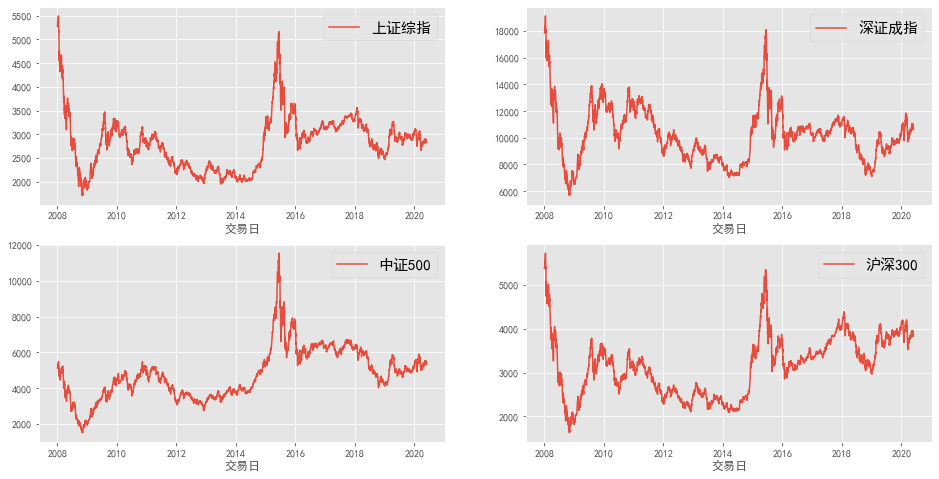

In [43]:
# 学会使用baostock获取金融数据
import numpy as np
import pandas as pd
import baostock as bs
plt.style.use('ggplot')
# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

# 获取指数(综合指数、规模指数、一级行业指数、二级行业指数、策略指数、成长指数、价值指数、主题指数)K线数据
# 综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
# 规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
# 一级行业指数，例如：sh.000037 上证医药，sz.399433 国证交运 等；
# 二级行业指数，例如：sh.000952 300地产，sz.399951 300银行 等；
# 策略指数，例如：sh.000050 50等权，sh.000982 500等权 等；
# 成长指数，例如：sz.399376 小盘成长 等；
# 价值指数，例如：sh.000029 180价值 等；
# 主题指数，例如：sh.000015 红利指数，sh.000063 上证周期 等；

# 详细指标参数，参见“历史行情指标参数”章节
index_list = []
stock_codes = ['sh.000001', 'sz.399001', 'sh.000905', 'sh.000300']
stock_names = ['上证综指', '深证成指', '中证500', '沪深300']
for i in stock_codes:
    rs = bs.query_history_k_data_plus(i,
                                      "date,code,open,high,low,close,preclose,volume,amount,pctChg",
                                      start_date='2008-01-02', end_date='2020-05-28', frequency="d")
    print('query_history_k_data_plus respond error_code:'+rs.error_code)
    print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)
    # 打印结果集
    data_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)
    result['date'] = pd.to_datetime(result['date'])
    result['close'] = result['close'].astype("float")
    index_list.append(result[['date', 'close']])
# 绘图
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(index_list[i]['date'], index_list[i]['close'], c="#e74c3c")
    plt.legend((stock_names[i],), loc='best', fontsize=15)
    plt.xlabel('交易日')
    plt.xticks()
plt.show()

在建模前，先介绍几个相关的金融概念：
- 股票的收益：所谓收益，其实就是股票的买入价和卖出价之差，如果每天都进行交易，那么股票的日收益就是交易当天的收盘价减去昨日收盘价，即：$y_t - y_{t-1}$；
- 股票的收益率：收益率就是收益的比率版本，即：$r_t = \dfrac{y_t-y_{t-1}}{y_{t-1}}$
- 股票的对数收益率：大多数时候，我们不会直接使用收益率，而是使用对数收益率，即：
$$
r_t = \frac{y_t-y_{t-1}}{y_{t-1}} = \frac{y_{t}}{y_{t-1}}-1 \sim ln(\frac{y_{t}}{y_{t-1}})
$$
- 为什么要使用对数收益率而不是直接使用收益率呢？对数收益率在直观上更接近真实的表现。比如股票价格从1元涨到10元，相当于翻了10倍，再从10元涨到100元，也是翻了1倍。如果单纯计算收益率, 那么从10元涨到100元的这一段明显会 “看起来涨了更多”。如果换算成对数收益率，都是$ln(10)$ ，那么就不会有这种直观偏差。
- 股票的预期收益率：预期收益率也称为期望收益率，是指如果没有意外事件发生时，根据已知信息所预测能得到的收益率。最简单的情况，其实就是历史收益率的数学期望，表示如果没有意外情况还会按照历史平均收益情况进行变化。
- 股票的风险：所谓风险，就是收益率的波动情况，衡量波动最简单的方式就是使用标准差 $\sigma$。

&emsp;&emsp;假设存在一个投资组合，由 $N$ 只股票构成，描述一个投资组合需要用到包括投资组合的预期收益率以及投资组合收益率的波动率两个重要的变量。

1. 投资组合的预期收益率
$$
E(R_p) = E\left(\sum_{i=1}^N w_i R_i \right) = \sum_{i=1}^N w_i E(R_i) \\
=[w_1, w_2, \cdots, w_N][E(R_1), E(R_2), \cdots, E(R_N)]^T
$$
&emsp;&emsp;其中：
- $E(R_p)$ 代表了投资组合的预期收益率
- $w_i$ 代表了投资组合中第 $i$ 只股票所占的权重，通常是股票的市值占投资组合整体市值的比例，$\displaystyle \sum_{i=1}^N w_i = 1$
- $E(R_i)$ 代表了投资组合中第 $i$ 只股票的预期收益率，通常用该股票过去收益率的均值代替
- $[w_1, w_2, \cdots, w_N]$ 代表了每只股票权重的向量
- $[E(R_1), E(R_2), \cdots, E(R_N)]^T$ 代表了每只股票预期收益率的向量 (列向量) 
- 在计算 $R_{i t}$ 即第 $i$ 只股票在第 $t$ 个交易日的收益率时，常使用对数收益率（连续复利的收益率) ：$R_{i t} = \ln \left(\dfrac{P_{i t}}{P_{i t-1}}\right)$
- $P_{i t}$ 表示第 $i$ 个股票在第 $t$ 个时刻的价格，$P_{i t-1}$ 表示第 $i$ 个股票在第 $t-1$ 个时刻的价格

&emsp;&emsp;按照一般规律：周波动率=$\sqrt{5} \times$ 日波动率，月波动率=$\sqrt{22} \times$ 日波动率，年波动率=$\sqrt{252} \times$ 日波动率。

2. 投资组合的波动率 (风险)

&emsp;&emsp;考虑 $N$ 个股票的收益波动率：
$$
\sigma_p = \sqrt{\sum_{i=1}^N \sum_{j=1}^N w_i w_j \text{Cov}(R_i, R_j)}
$$
&emsp;&emsp;由于相关系数 $\rho_{i j} = \dfrac{\text{Cov}(R_i, R_j)}{\sigma_i \sigma_j}$， 因此 $\sigma_p = \sqrt{\sum_{i=1}^N \sum_{j=1}^N \rho_{i j} w_i w_j \sigma_i \sigma_j}$。

&emsp;&emsp;写成矩阵的形式: $\sigma_p = \sqrt{w \Sigma w^{T}}$，其中 $w = [w_1, w_2, \cdots, w_N], 
\Sigma = \left[\begin{array}{cccc}
\sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1 N} \\
\sigma_{21} & \sigma_2^2 & \cdots & \sigma_{2 N} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
\sigma_{N 1} & \sigma_{N 2} & \cdots & \sigma_N^2
\end{array}\right]$

&emsp;&emsp;那什么是最优投资组合呢？其实十分简单：期望收益下的风险最小的组合。有效前沿是可行集的一条包络线，表示了在不同的风险条件下能够给投资者带来的最高预期收益率，或者在不同预测收益条件下能够给投资者带来的最低波动率（风险）。其实就是求解以下最优条件：
$$
\begin{aligned}
\min _{w_i} \quad & \sigma_p = \min _{w_i} \sqrt{\sum_{i=1}^N \sum_{j=1}^N w_i w_j \text{Cov}(R_i, R_j)} \\
\text{s.t.} \quad & \sum_{i=1}^{N} w_{i}=1 \quad \text{组合内每个股票投资比例之和为1} \\
& E(R_p) = E\left(\sum_{i=1}^N w_i R_i \right)\quad \text{客户想要的收益率} \\
& w_i > 0 \text { (不允许卖空（不允许借入股票）, 即不允许融券) }
\end{aligned}
$$

In [44]:
# 获取组合股票数据： 600000 浦发银行， 600004 白云机场， 600019 宝钢股份， 600028 中国石化， 600030 中信证券

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
stock_codes = ['sh.600000', 'sh.600004', 'sh.600019', 'sh.600028', 'sh.600030']
stock_datalist = []
for i in stock_codes:
    rs = bs.query_history_k_data_plus(i,
                                      "date,close",
                                      start_date='2016-01-01', end_date='2021-12-31',
                                      frequency="d", adjustflag="3")
    print('query_history_k_data_plus respond error_code:'+rs.error_code)
    print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

    #### 打印结果集 ####
    data_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)
    stock_datalist.append(result)
    print(result)

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
            date    close
0     2016-01-04  17.8000
1     2016-01-05  17.9600
2     2016-01-06  18.1000
3     2016-01-07  17.5100
4     2016-01-08  17.4900
...          ...      ...
1456  2021-12-27   8.5600
1457  2021-12-28   8.5700
1458  2021-12-29   8.5400
1459  2021-12-30   8.5400
1460  2021-12-31   8.5300

[1461 rows x 2 columns]
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
            date    close
0     2016-01-04  13.0400
1     2016-01-05  13.1400
2     2016-01-06  13.4300
3     2016-01-07  12.4200
4     2016-01-08  12.7000
...          ...      ...
1456  2021-12-27  11.7100
1457  2021-12-28  11.6000
1458  2021-12-29  12.0000
1459  2021-12-30  12.0300
1460  2021-12-31  12.0600

[1461 rows x 2 columns]
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
            date   close
0

date    object
浦发银行    object
白云机场    object
宝钢股份    object
中国石化    object
中信证券    object
dtype: object
date    datetime64[ns]
浦发银行           float64
白云机场           float64
宝钢股份           float64
中国石化           float64
中信证券           float64
dtype: object


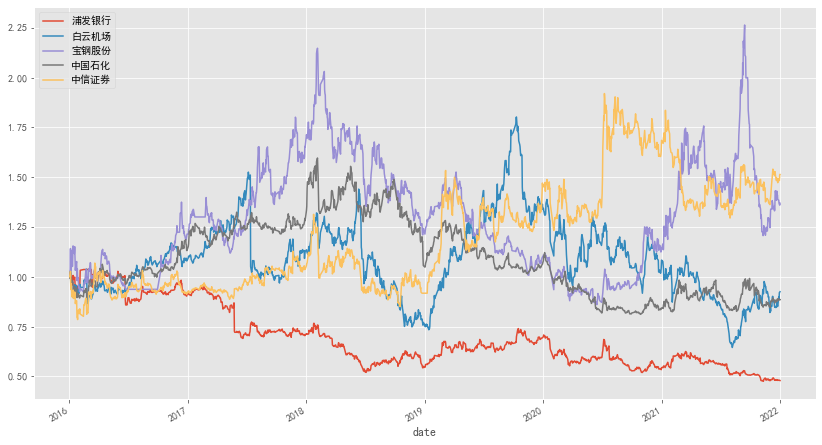

In [45]:
# 处理数据
data_stock = pd.DataFrame(
    {
        'date': stock_datalist[0]['date'],
        '浦发银行': stock_datalist[0]['close'],
        '白云机场': stock_datalist[1]['close'],
        '宝钢股份': stock_datalist[2]['close'],
        '中国石化': stock_datalist[3]['close'],
        '中信证券': stock_datalist[4]['close'],
    }
)
print(data_stock.dtypes)  # 转换数据格式
data_stock['date'] = pd.to_datetime(data_stock['date'])
data_stock['浦发银行'] = data_stock['浦发银行'].astype('float')
data_stock['白云机场'] = data_stock['白云机场'].astype('float')
data_stock['宝钢股份'] = data_stock['宝钢股份'].astype('float')
data_stock['中国石化'] = data_stock['中国石化'].astype('float')
data_stock['中信证券'] = data_stock['中信证券'].astype('float')
print(data_stock.dtypes)

data_stock = data_stock.set_index('date')
# 归一化
(data_stock/data_stock.iloc[0]).plot(figsize=(14, 8))
plt.show()

In [46]:
# 计算对数收益率
R = np.log(data_stock/data_stock.shift(1))  # log(y_t) - log(y_{t-1})
R = R.dropna()
R.describe()

,浦发银行,白云机场,宝钢股份,中国石化,中信证券
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,-0.000504,-0.000054,0.000215,-0.000084,0.000284
std,0.013782,0.023718,0.022161,0.013956,0.020667
min,-0.179352,-0.362493,-0.104747,-0.072812,-0.105527
25%,-0.006227,-0.011185,-0.010091,-0.006659,-0.008934
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005100,0.010945,0.010133,0.006817,0.009017
max,0.086415,0.095634,0.095648,0.071707,0.095578


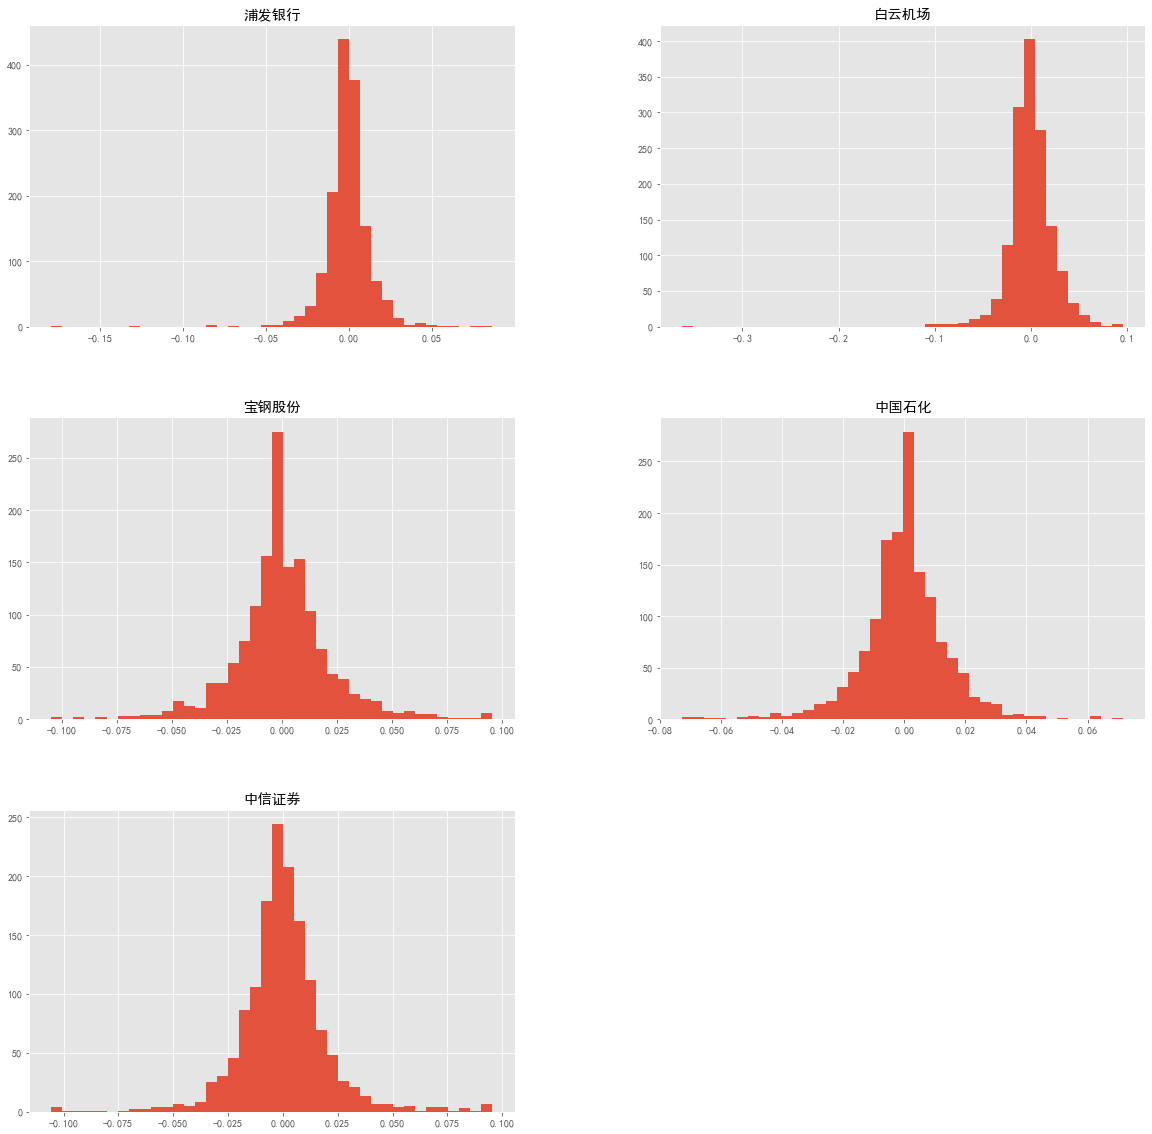

In [47]:
# 可视化对数收益率
R.hist(bins=40, figsize=(20, 20), alpha=0.95)
plt.show()

In [48]:
# 计算每只股票的平均收益率
R_mean = R.mean()*252   # 计算股票的平均年化收益率
print("平均年化收益率:\n", R_mean)

平均年化收益率:
 浦发银行   -0.126968
白云机场   -0.013485
宝钢股份    0.054214
中国石化   -0.021099
中信证券    0.071527
dtype: float64


In [49]:
# 计算每只股票的波动率，协方差
R_cov = R.cov()*252   # 计算股票的协方差矩阵并且年化处理
print("协方差矩阵")
R_cov

协方差矩阵


,浦发银行,白云机场,宝钢股份,中国石化,中信证券
浦发银行,0.047869,0.020379,0.022801,0.017419,0.031552
白云机场,0.020379,0.141760,0.034336,0.021096,0.049400
宝钢股份,0.022801,0.034336,0.123759,0.034540,0.046216
中国石化,0.017419,0.021096,0.034540,0.049082,0.029506
中信证券,0.031552,0.049400,0.046216,0.029506,0.107633


In [50]:
# 计算每个股票的相关系数矩阵
R_corr = R.corr()    # 计算股票的相关系数矩阵
print("相关系数矩阵:")
R_corr

相关系数矩阵:


,浦发银行,白云机场,宝钢股份,中国石化,中信证券
浦发银行,1.000000,0.247388,0.296233,0.359359,0.439562
白云机场,0.247388,1.000000,0.259232,0.252913,0.399929
宝钢股份,0.296233,0.259232,1.000000,0.443169,0.400437
中国石化,0.359359,0.252913,0.443169,1.000000,0.405954
中信证券,0.439562,0.399929,0.400437,0.405954,1.000000


In [51]:
# 计算每个股票的年化收益波动率
R_vol = R.std()*np.sqrt(252)  # 计算股票收益率的年化波动率(方差)
print('股票收益率的年化波动率(方差):\n', R_vol)

股票收益率的年化波动率(方差):
 浦发银行    0.218790
白云机场    0.376510
宝钢股份    0.351794
中国石化    0.221545
中信证券    0.328074
dtype: float64


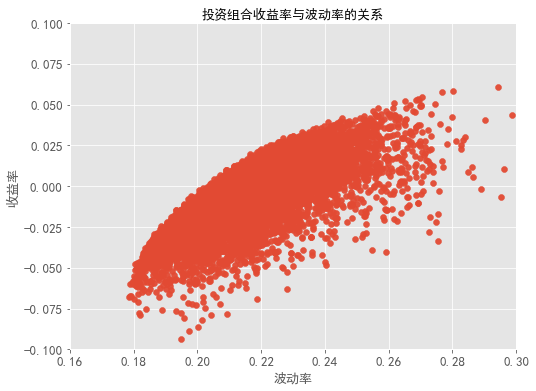

In [52]:
# 1. 绘制可行集,每种波动率条件下的收益率变化
Rp_list = []   # 初始的投资组合收益率数组
Vp_list = []   # 初始的投资组合收益波动率数组
for i in np.arange(10000):   # 生成1000个不同权重的预期收益率和收益波动率
    x = np.random.random(5)
    weight = x/np.sum(x)
    Rp_list.append(np.sum(weight*R_mean))
    Vp_list.append(np.sqrt(np.dot(weight, np.dot(R_cov, weight.T))))
plt.figure(figsize=(8, 6))
plt.scatter(Vp_list, Rp_list, alpha=0.95)
plt.xlabel(u"波动率", fontsize=13)
plt.ylabel(u'收益率', fontsize=13, rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.16, 0.3)
plt.ylim(-0.1, 0.1)
plt.title(u'投资组合收益率与波动率的关系', fontsize=13)
plt.show()

In [53]:
# 构建有限前沿
import scipy.optimize as sco


def f(w):  # 构建最优化函数
    w = np.array(w)
    Rp_opt = np.sum(w*R_mean)
    Vp_opt = np.sqrt(np.dot(w, np.dot(R_cov, w.T)))
    return np.array([Rp_opt, Vp_opt])


def Vmin_f(w):   # 获得最小波动率
    return f(w)[1]


cons = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})  # 所有权重和为1
bnds = tuple((0, 1) for x in range(len(R_mean)))  # 每个权重必须要在区间(0,1)

result = sco.minimize(Vmin_f, len(
    R_mean)*[1.0/len(R_mean)], method='SLSQP', bounds=bnds, constraints=cons)
print("投资组合预期收益率 10% 时浦发银行的权重", round(result['x'][0], 4))
print("投资组合预期收益率 10% 时白云机场的权重", round(result['x'][1], 4))
print("投资组合预期收益率 10% 时宝钢股份的权重", round(result['x'][2], 4))
print("投资组合预期收益率 10% 时中国石化的权重", round(result['x'][3], 4))
print("投资组合预期收益率 10% 时中信证券的权重", round(result['x'][4], 4))

投资组合预期收益率 10% 时浦发银行的权重 0.4587
投资组合预期收益率 10% 时白云机场的权重 0.0877
投资组合预期收益率 10% 时宝钢股份的权重 0.0294
投资组合预期收益率 10% 时中国石化的权重 0.4242
投资组合预期收益率 10% 时中信证券的权重 0.0


In [54]:
Rp_vmin = np.sum(R_mean*result['x'])
Vp_vmin = result['fun']
print('波动率在可行集是全局最小值的投资组合预期收益率', round(Rp_vmin, 4))
print('在可行集是全局最小值的波动率', round(Vp_vmin, 4))

波动率在可行集是全局最小值的投资组合预期收益率 -0.0668
在可行集是全局最小值的波动率 0.1782


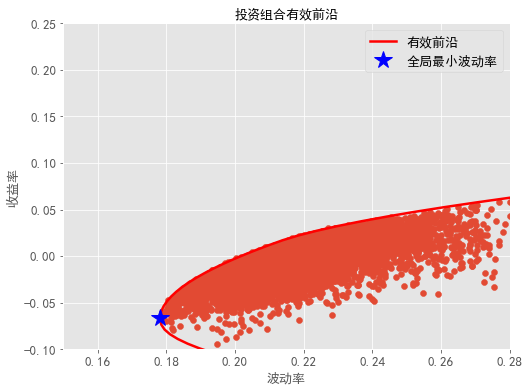

In [55]:
# 绘制有效前沿
Rp_target = np.linspace(-0.2, 0.3, 100)
Vp_target = []
for r in Rp_target:
    cons_new = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1},
                {'type': 'eq', 'fun': lambda x: f(x)[0]-r})
    bnds = tuple((0, 1) for x in range(len(R_mean)))  # 每个权重必须要在区间(0,1)
    result_new = sco.minimize(Vmin_f, len(
        R_mean)*[1.0/len(R_mean), ], method='SLSQP', bounds=bnds, constraints=cons_new)
    Vp_target.append(result_new['fun'])
plt.figure(figsize=(8, 6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target, Rp_target, 'r-', label=u'有效前沿', lw=2.5)
plt.plot(Vp_vmin, Rp_vmin, 'b*', label=u'全局最小波动率', markersize=18)
plt.xlabel(u'波动率', fontsize=13)
plt.ylabel(u'收益率', fontsize=13, rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.15, 0.28)
plt.ylim(-0.1, 0.25)
plt.title(u'投资组合有效前沿', fontsize=13)
plt.legend(fontsize=13)
plt.show()

<div class="alert alert-warning" role="alert">
<h3>📋任务</h3> 
&emsp;&emsp;我们刚刚构建的组合都是基于有风险的资产，如：股票等，并没涉及无风险资产，如：国债、存款等。现在大家可以将无风险资产纳入投资组合中，存在无风险资产时，投资者可以通过贷出自有资金减少自己的风险，当然这样会降低期望报酬率；也可以通过借入资金，增加购买风险资产的投入资金，从而提高期望报酬率。这样也就意味着投资者可以按照无风险利率借入或者借出任何数量的资金，这样就引出的是：<strong>资产市场线</strong>.
</div>

&emsp;&emsp;假设投资组合的风险资产 $M$ 和无风险资产资产 $F$，设 $R_M$ 为风险资产收益率，风险资产的期望收益 $E(R_M)$，风险资产的波动率为 $\sigma_M$，无风险资产的收益率为 $R_F$，无风险资产的波动率为0（无风险）。

&emsp;&emsp;假设风险资产与无风险资产的投资比例为 $y$ 和 $1-y$，那么整个组合的收益率为 $R_p = y E(R_M) + (1-y) R_F = R_F + y [ E(R_M) - R_F]$。因此整个组合的预期收益率为：
$$
E(R_p) = R_F + y [E(R_M) - R_F]
$$
&emsp;&emsp;整个组合的波动率为：
$$
\sigma_p = y\sigma_M
$$
&emsp;&emsp;因此，$y = \dfrac{\sigma_p}{\sigma_M}$，代入整个组合的预期收益率方程得：$E(R_p) = R_F + [E(R_M) - R_F] \dfrac{\sigma_p}{\sigma_M}$，我们把 $\dfrac{E(R_M) - R_F}{\sigma_M}$ 称为夏普比率(Sharpe Ratio)，也称为资本市场线的斜率，夏普比率就是整个组合预期收益率直线的斜率，我们希望斜率越大越好，这样获得的收益就会越大。

&emsp;&emsp;计算资本市场线的斜率就是求解以下优化问题：
$$
\max _{w_i} \frac{E(R_M) - R_F}{\sigma_M} 
$$
约束为$\displaystyle \sum_{i=1}^N w_i = 1$，其中 $w_i$ 为第 $i$ 种风险资产在风险资产组合中的比例。

In [ ]:
# 求解资本市场线(请在“----------------”处补全代码)
def F(w):
    Rf = 0.02
    w = np.array(w)
    # 请根据风险组合的预期收益率公式补全以下代码
    RM_opt = -------------------------   # E(R_M)
    # 请根据市场组合的波动率补全以下代码
    VM_opt = --------------------------  # sigma_M
    # 请根据夏普比率公式补全以下代码
    SR = --------------------------
    return np.array([RM_opt, VM_opt, SR])

# 最大值等于最小化负的最小值


def SRmin_F(w):
    return -F(w)[2]


# 请根据约束：所有风险组合的投资比例和为1的约束补全以下代码
cons_SR = ({'type': ---------------, 'fun': lambda x: ---------------})
bnds = tuple((0, 1) for x in range(len(R_mean)))  # 每个权重必须要在区间(0,1)，禁止卖空
# 请根据最优化的目标表达式和约束条件补全以下代码
result_SR = sco.minimize(-------------------------------)
Rf = 0.02
slope = -result_SR['fun']   # 资本市场线斜率
Rm = np.sum(R_mean*result_SR['x'])  # 计算风险组合的预期收益率
Vm = (Rm-Rf) / slope  # 计算风险组合的波动率
print('市场组合的预期收益率', round(Rm, 4))
print('市场组合的波动率', round(Vm, 4))

In [ ]:
# 资本市场线可视化
Rp_cml = np.linspace(0.02, 0.25)
Vp_cml = (Rp_cml-Rf) / slope

plt.figure(figsize=(8, 6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target, Rp_target, 'r-', label=u'有效前沿', lw=2.5)
plt.plot(Vp_cml, Rp_cml, 'b--', label=u'资本市场线', lw=2.5)
plt.plot(Vp_vmin, Rp_vmin, 'b*', label=u'全局最小波动率', markersize=18)
plt.plot(Vm, Rm, 'g*', label=u'市场组合', markersize=14)
plt.xlabel(u'波动率', fontsize=13)
plt.ylabel(u'收益率', fontsize=13, rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0, 0.32)
plt.ylim(-0.1, 0.25)
plt.title(u'投资组合理论的可视化', fontsize=13)
plt.legend(fontsize=13)
plt.show()

&emsp;&emsp;在蓝色的资本市场线上，当 $x=0$ 时，代表购入全部的资产都是无风险资产，绿色的市场组合点表示所有资金都投资风险资产，因此在资本市场线上可以出现以下情况：

| 风险资产占总投资资产的投资比例 | 投资情况                    | 期望报酬率     | 风险     |
| :-------------- | :---------------------- | :-------- | :----- |
| y > 1           | 把自有资金与借入资金都投入风险投资       | 高于市场报酬率   | 高于市场风险 |
| y = 1           | 把自有资金全部投入风险投资           | 等于市场报酬率   | 等于市场风险 |
| y < 1           | 把自有资金部分投资风险资产，部分投资无风险资产 | 低于市场报酬率   | 低于市场风险 |
| y = 0           | 把自有资产全部投资于无风险资产         | 等于无风险资产利率 | 无风险    |

&emsp;&emsp;资本市场线实际上指出了有效投资组合风险与预期收益率之间的关系，提供了衡量有效投资组合风险的方法。对于每一个有效投资组合而言，给定其风险的大小，便可根据资本市场线知道其预期收益率的大小。

<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Well done!</h4>
  <p>恭喜你，完成了《动手学数理统计》的学习，希望在日后的数模竞赛中，通过本课程的学习，你可以更加灵活掌握各类统计学的工具，取得优异的成绩.</p>
  <hr>
  <p>如有需要领取本次组队学习的答案，敬请关注公众号以及留意直播讲解！</p>
</div>